# Bad Lightcurves

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Making dataframes

In [2]:
for i in range(1,27):
    filename = 's%d.txt' % i
    variable_name = 'sector_%d' % i
    file_path = os.path.join('..', 'outputs', filename)

    # Use the custom function to read the file and assign it to a dynamically named variable
    try:
        # Use the custom function to read the file and assign it to a dynamically named variable
        exec("%s = get_output('%s')" % (variable_name, file_path))
    except FileNotFoundError:
        # Handle the case where the file doesn't exist
        print(f"File '{filename}' not found. Moving to the next file.")
        continue

File 's6.txt' not found. Moving to the next file.
File 's7.txt' not found. Moving to the next file.
File 's8.txt' not found. Moving to the next file.
File 's12.txt' not found. Moving to the next file.
File 's13.txt' not found. Moving to the next file.
File 's14.txt' not found. Moving to the next file.


## Distributions before any cuts

Dataframe 'sector_6' not found. Moving to the next sector.
Dataframe 'sector_7' not found. Moving to the next sector.
Dataframe 'sector_8' not found. Moving to the next sector.
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.
Dataframe 'sector_14' not found. Moving to the next sector.


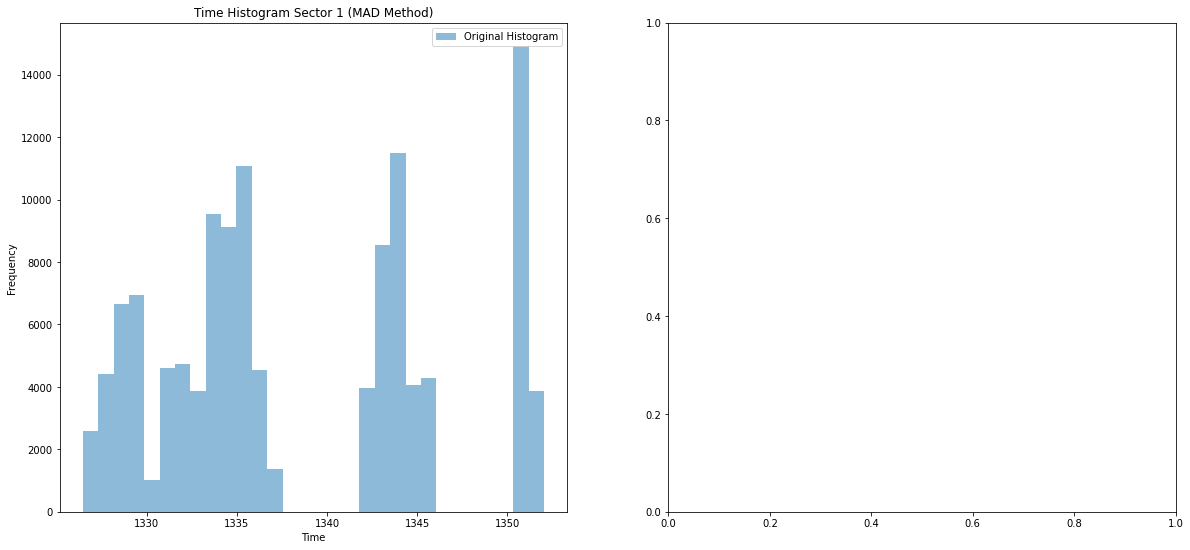

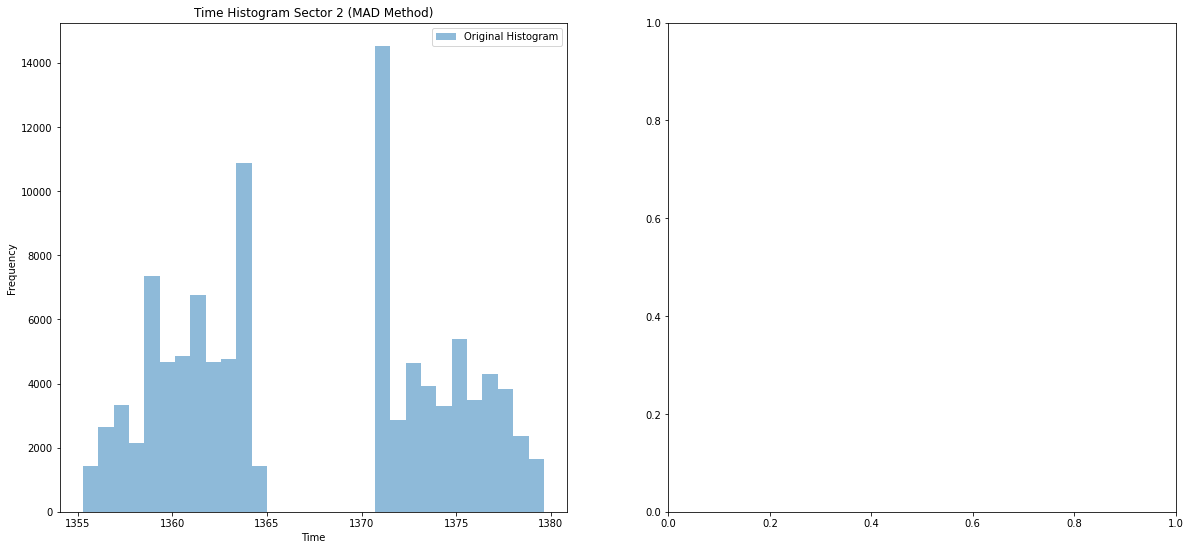

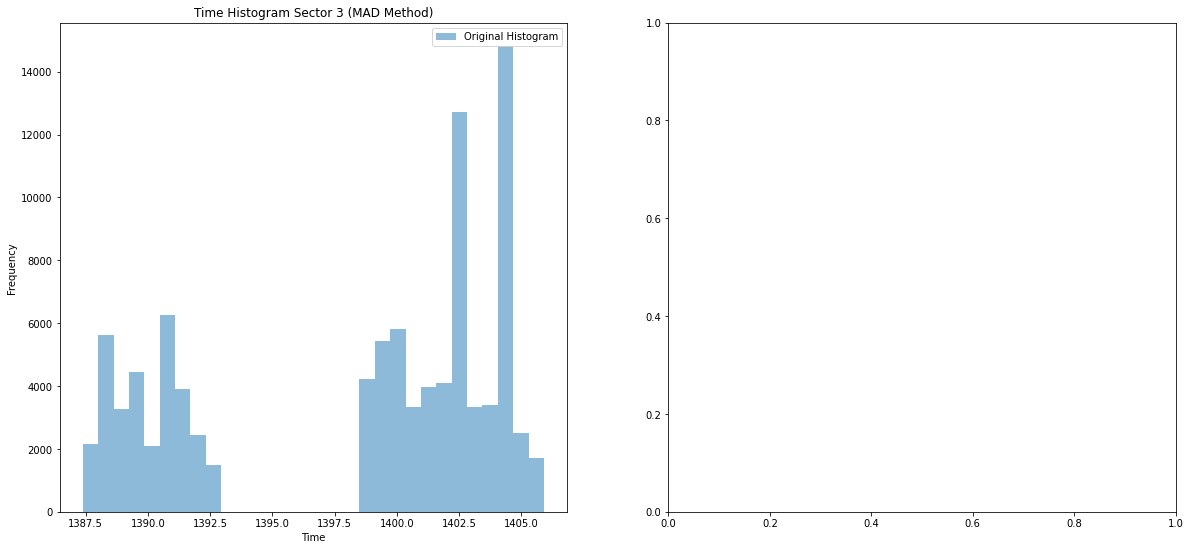

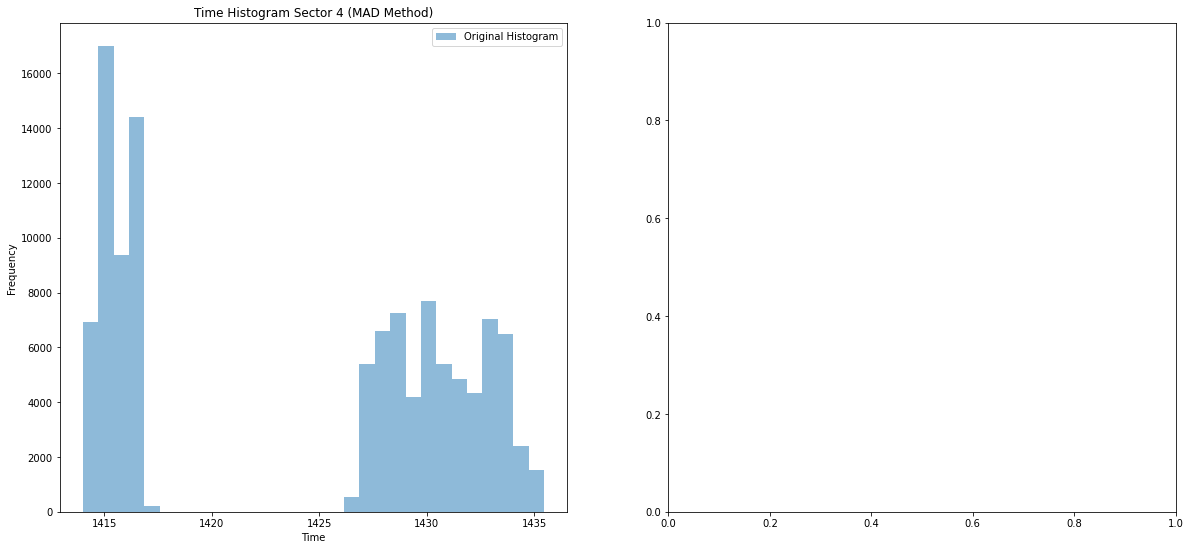

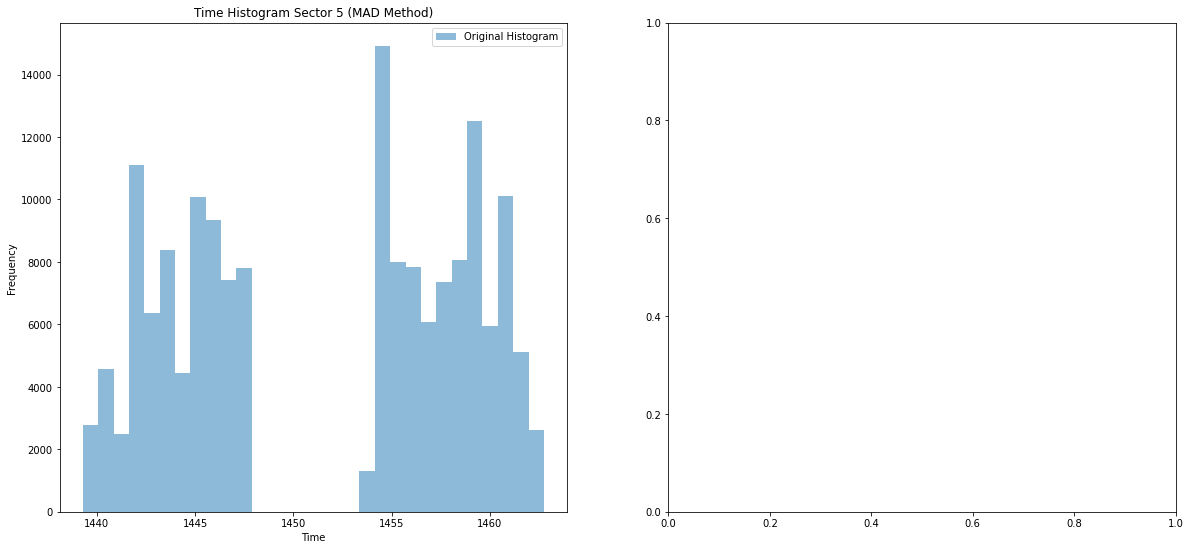

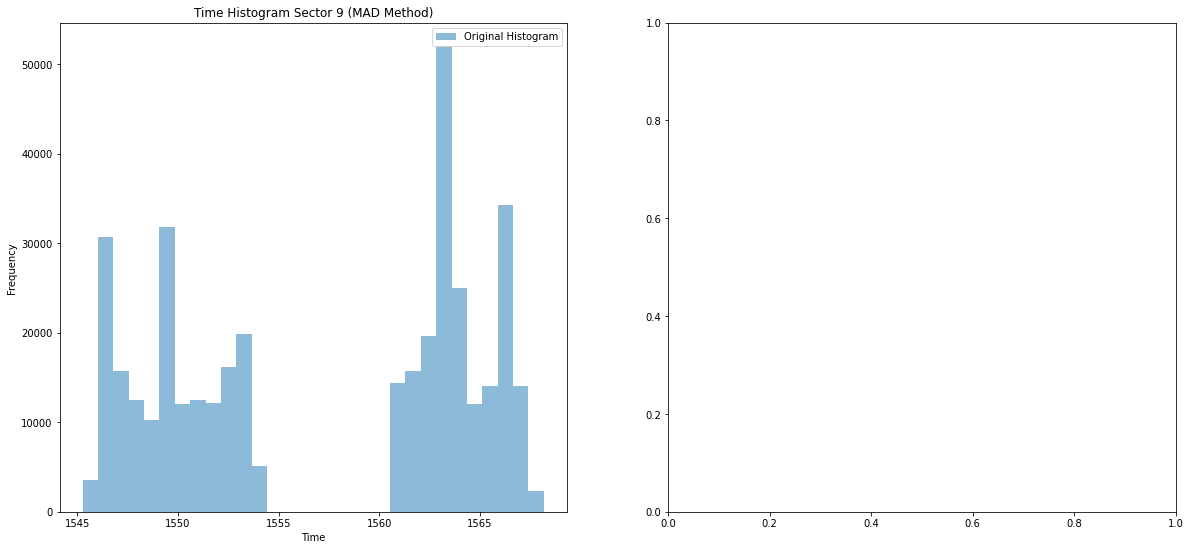

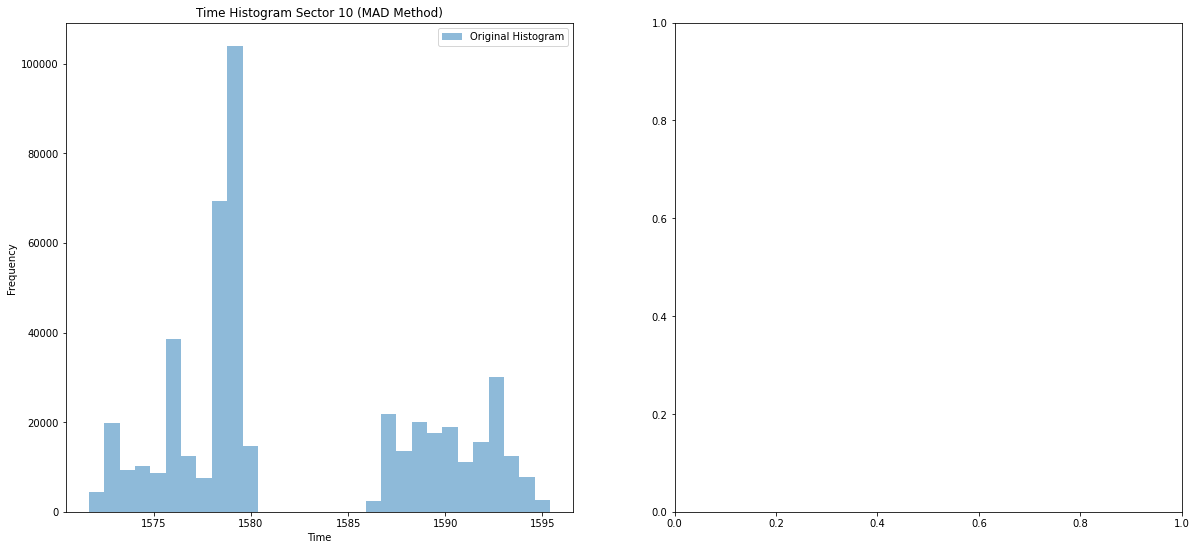

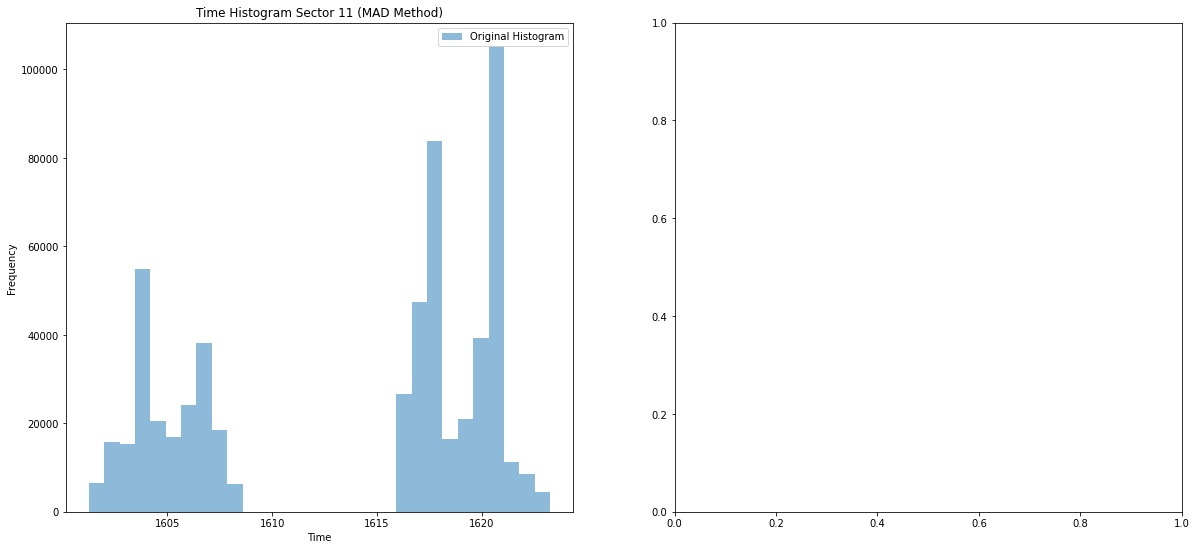

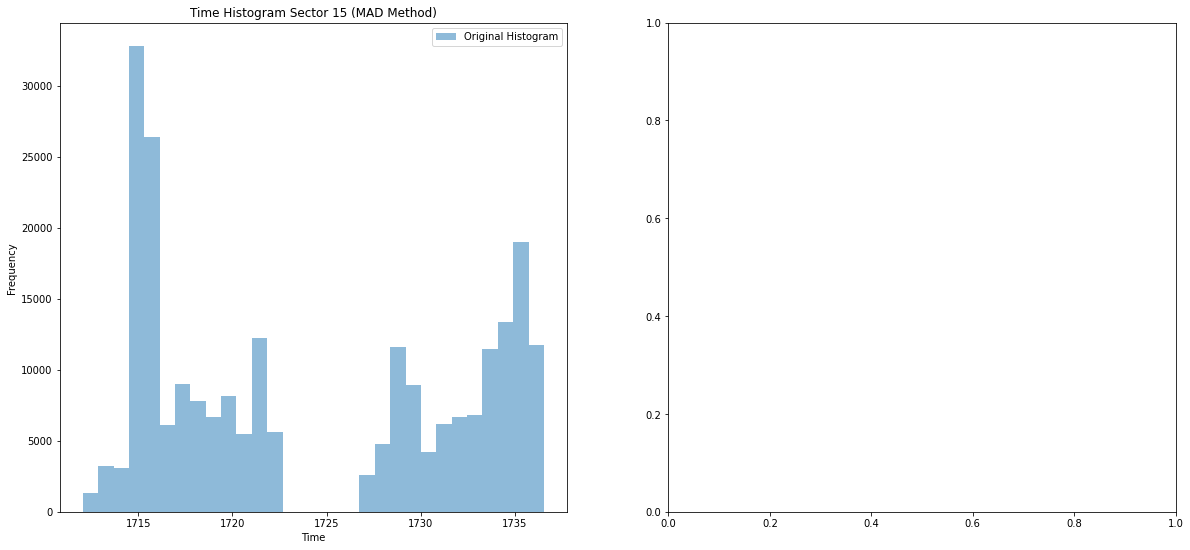

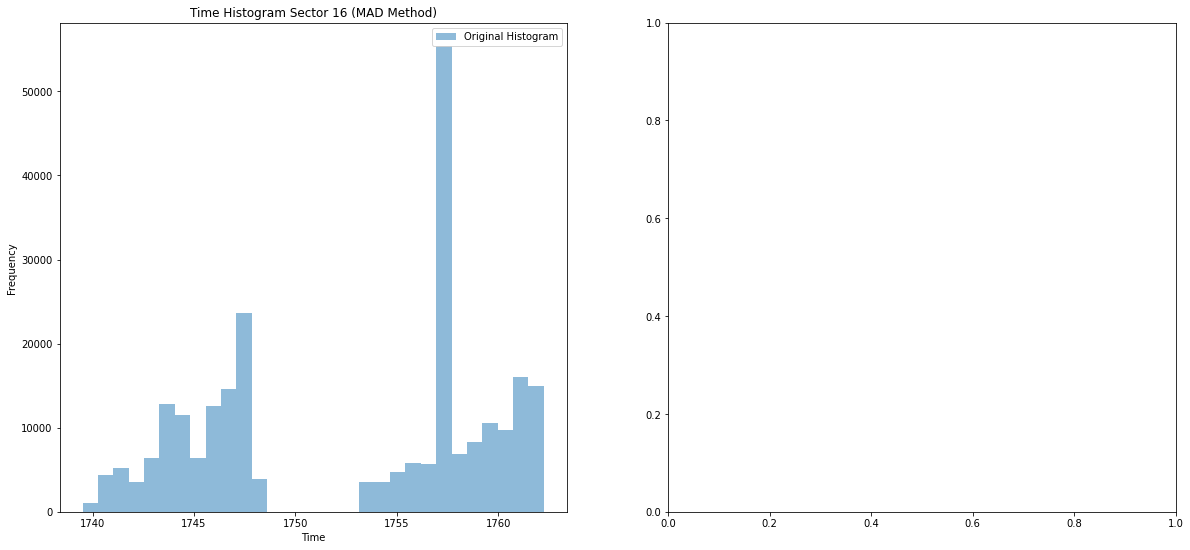

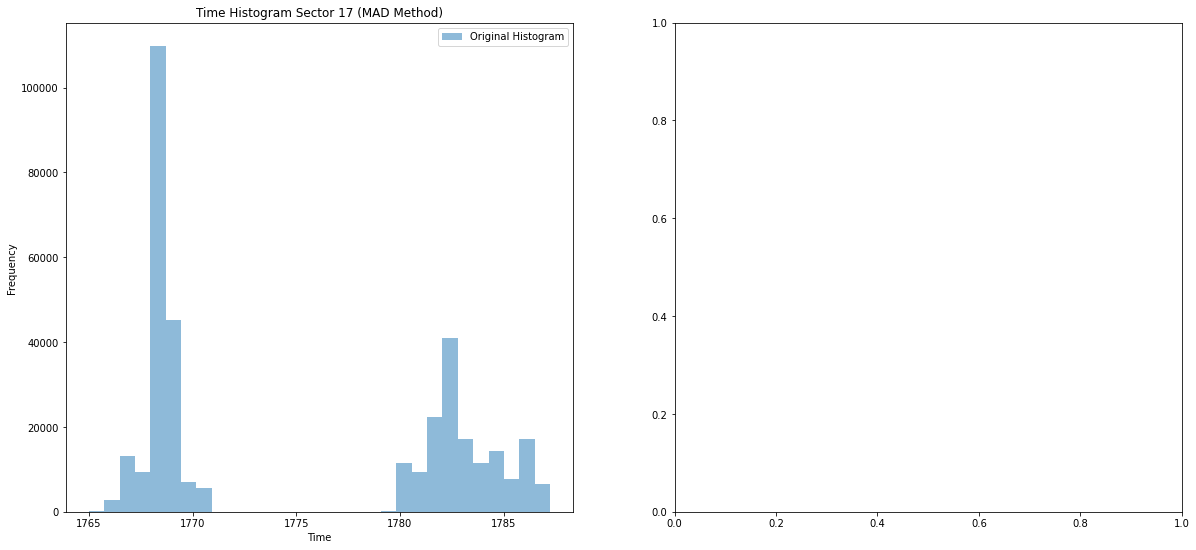

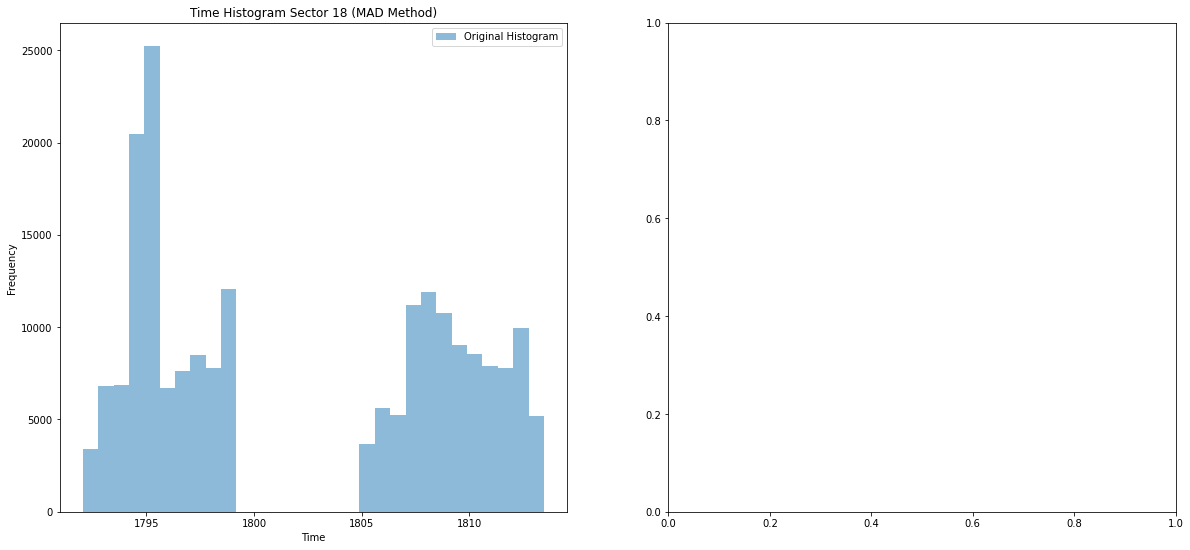

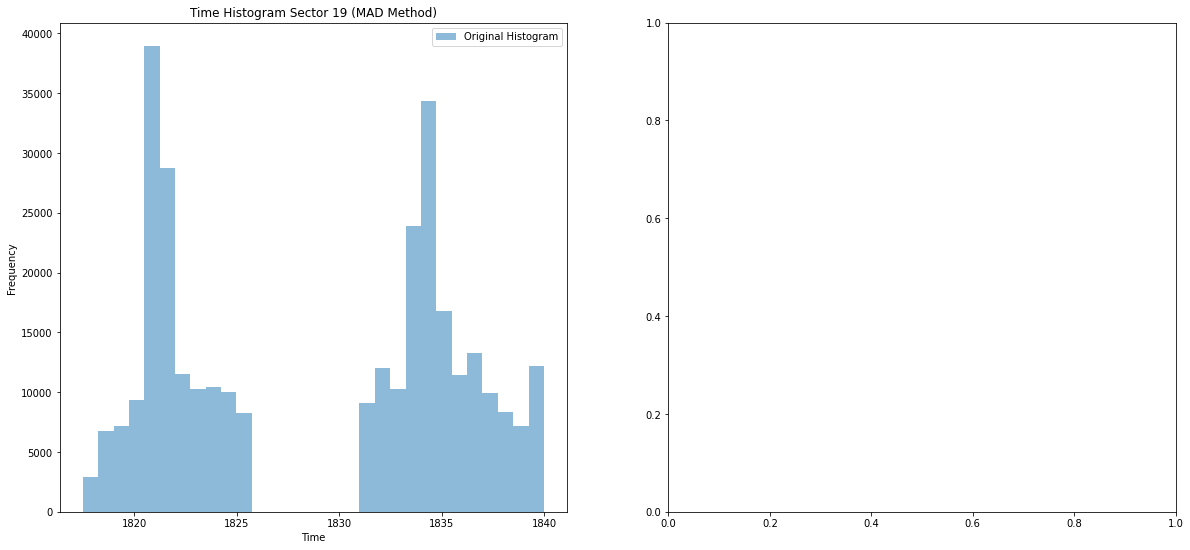

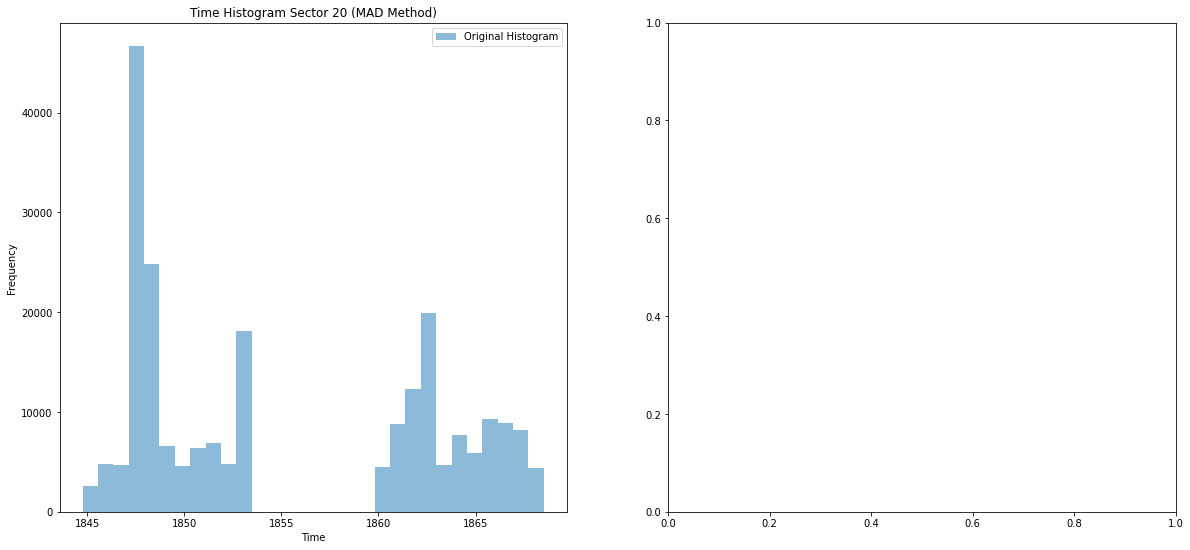

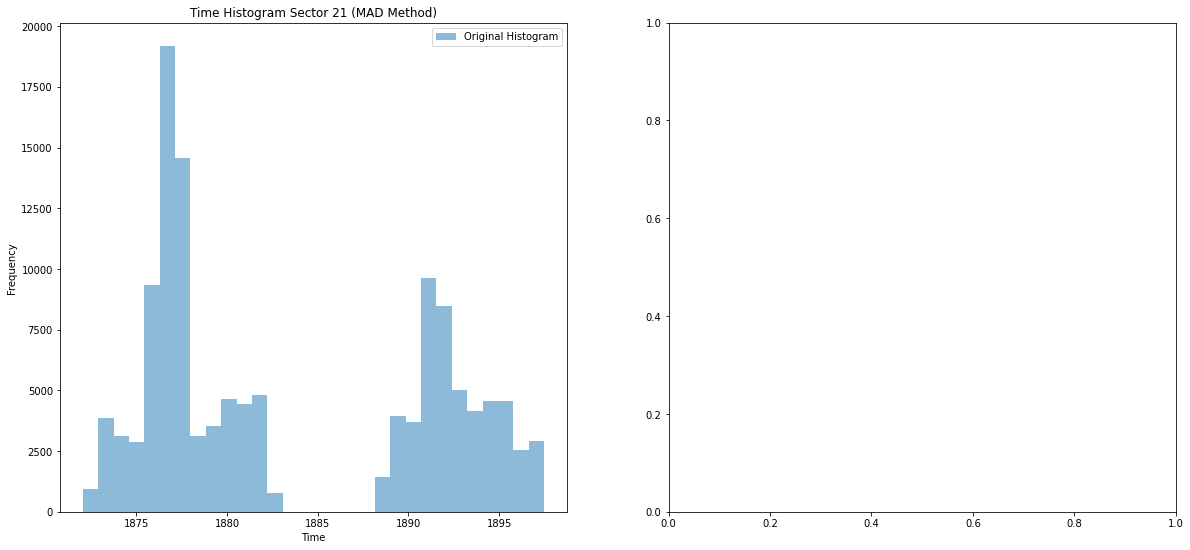

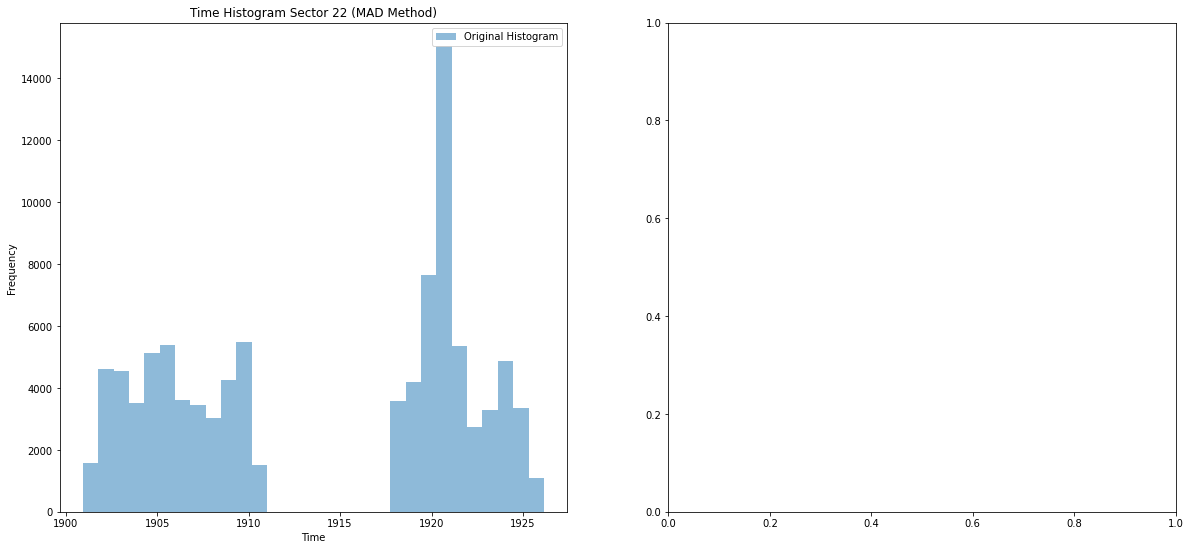

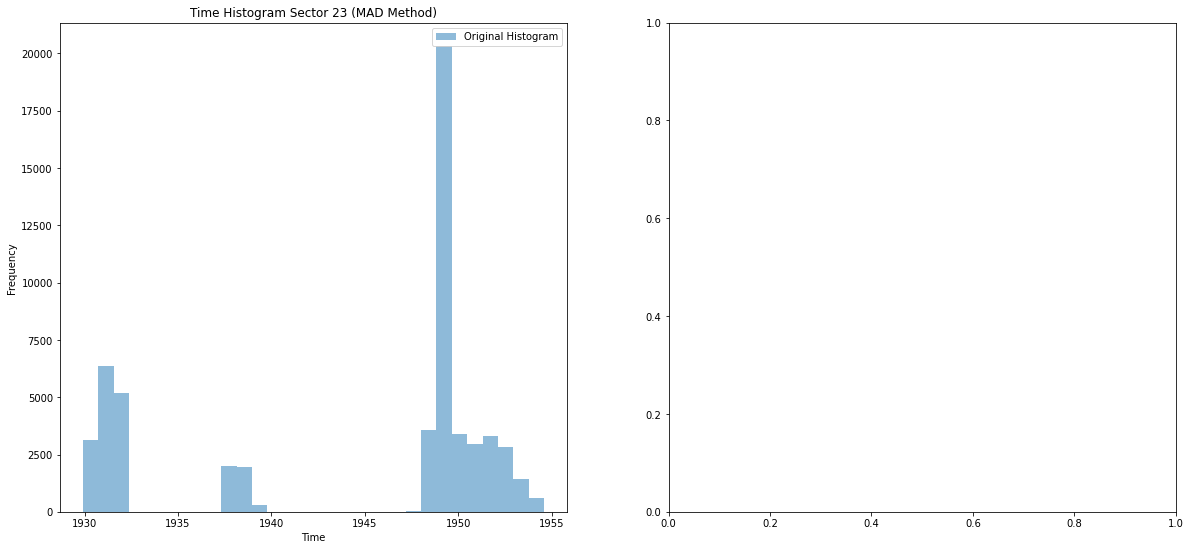

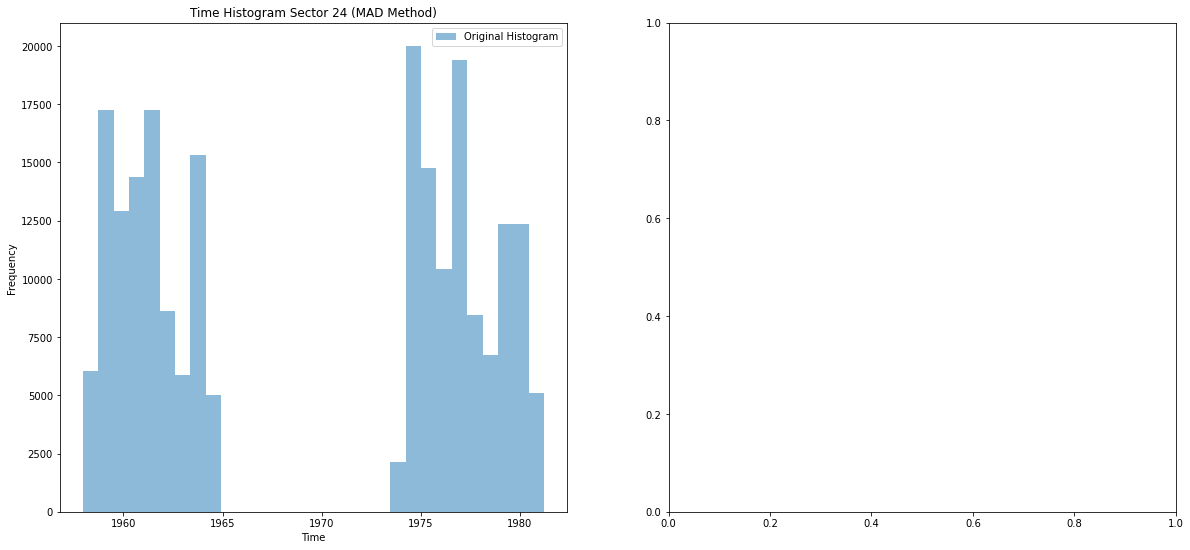

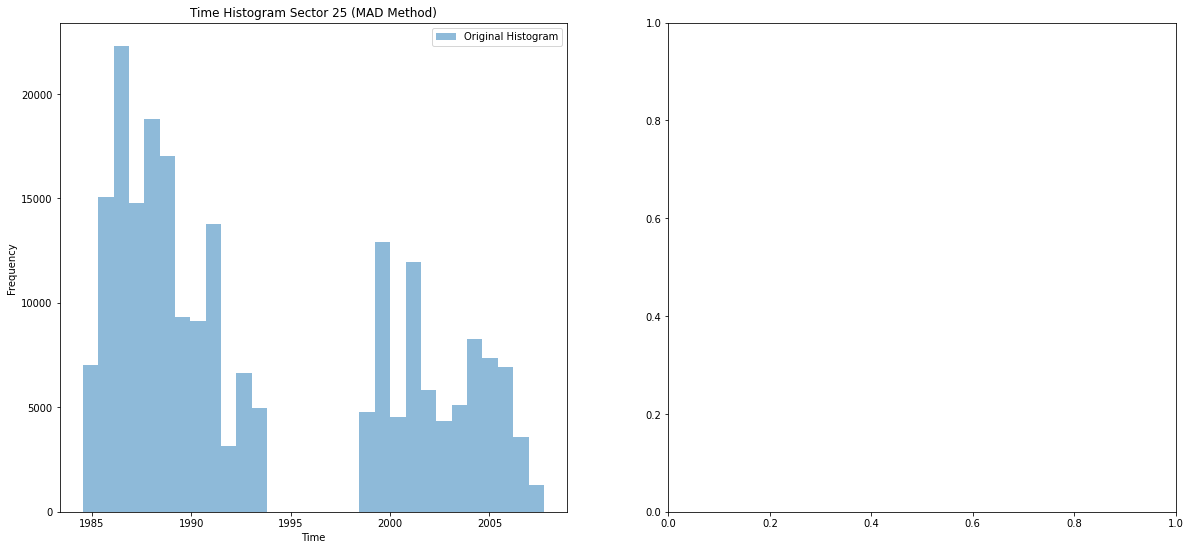

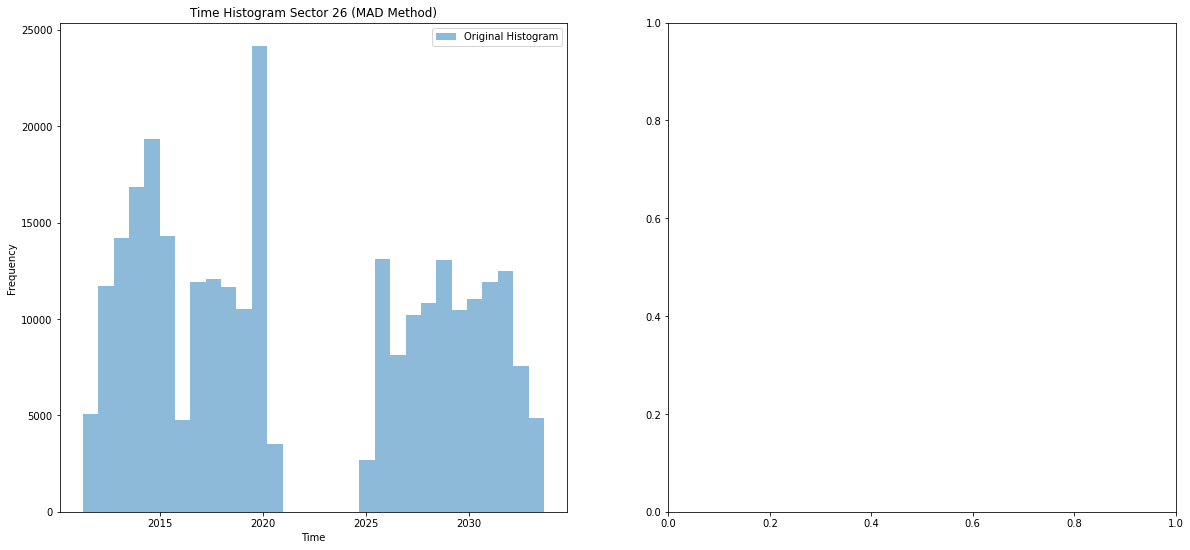

In [3]:
#data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
        data = data[data.transit_prob == 'maybeTransit']
        data = data[(data.asym_score <= 3)].reset_index(drop=True)
        data_new = data[abs(data.snr) >= 6].reset_index(drop=True)
        data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
        data_new['abs_depth'] = abs(data_new.depth)
        data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
        
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data['time'], bins=30)
    # Plot the original 'data_new.time' histogram
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    ax[0].hist(data['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()

## MAD Method

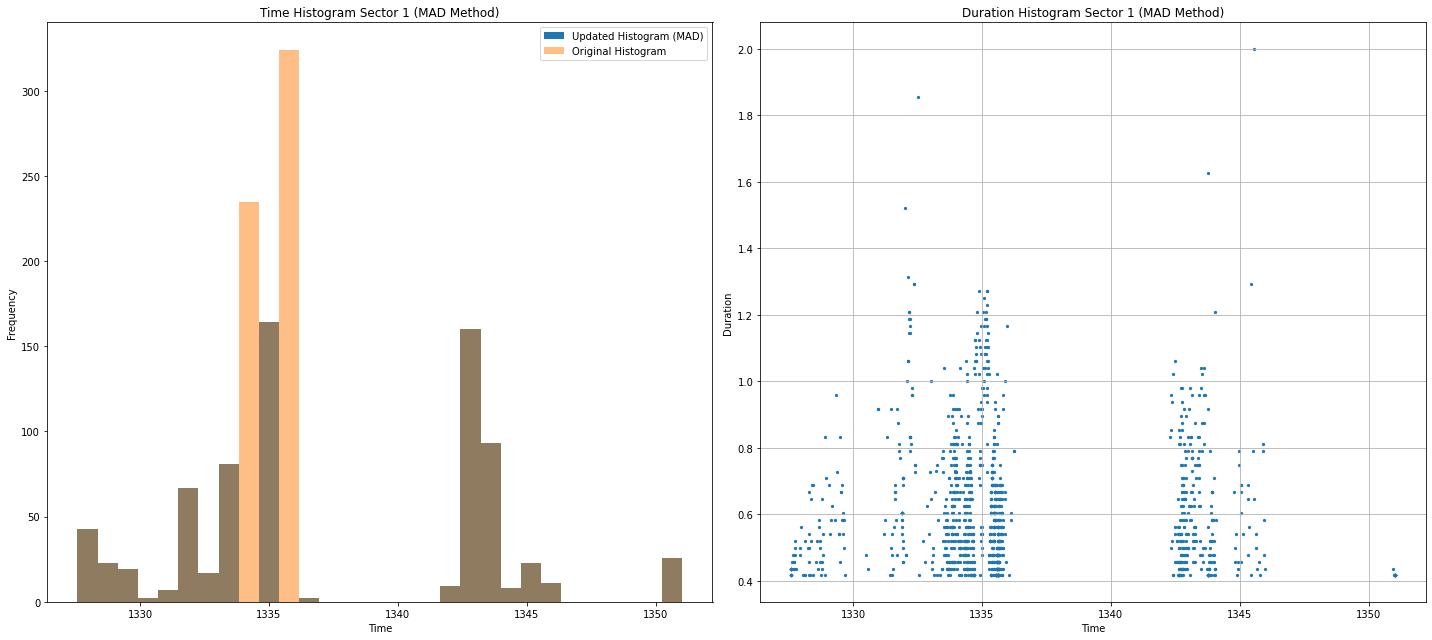

total candidates of Sector 1: 1314
total bad lcs: 559
Bins of bad lightcurves:
    Bin Range: 1333.8304966666667 - 1334.61262
    Bin Range: 1335.3947433333333 - 1336.1768666666667


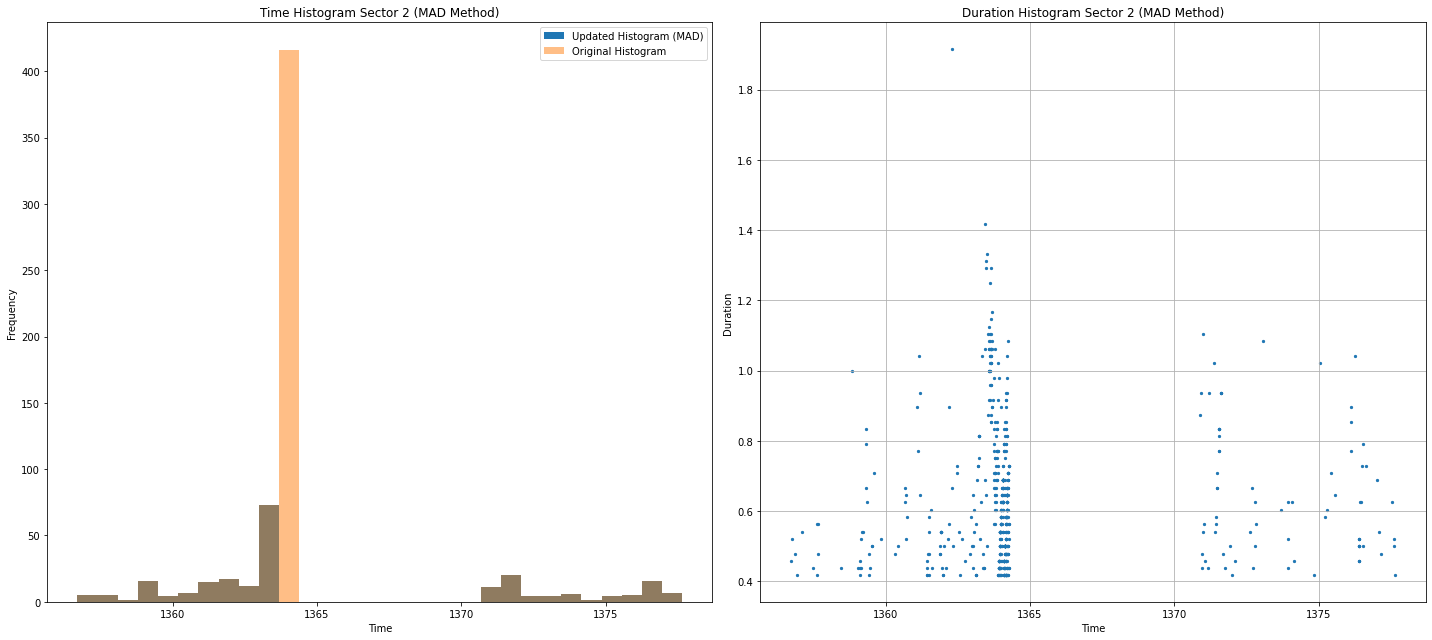

total candidates of Sector 2: 649
total bad lcs: 416
Bins of bad lightcurves:
    Bin Range: 1363.68843 - 1364.3869459999999
Dataframe 'sector_3' not found. Moving to the next sector.
Dataframe 'sector_4' not found. Moving to the next sector.


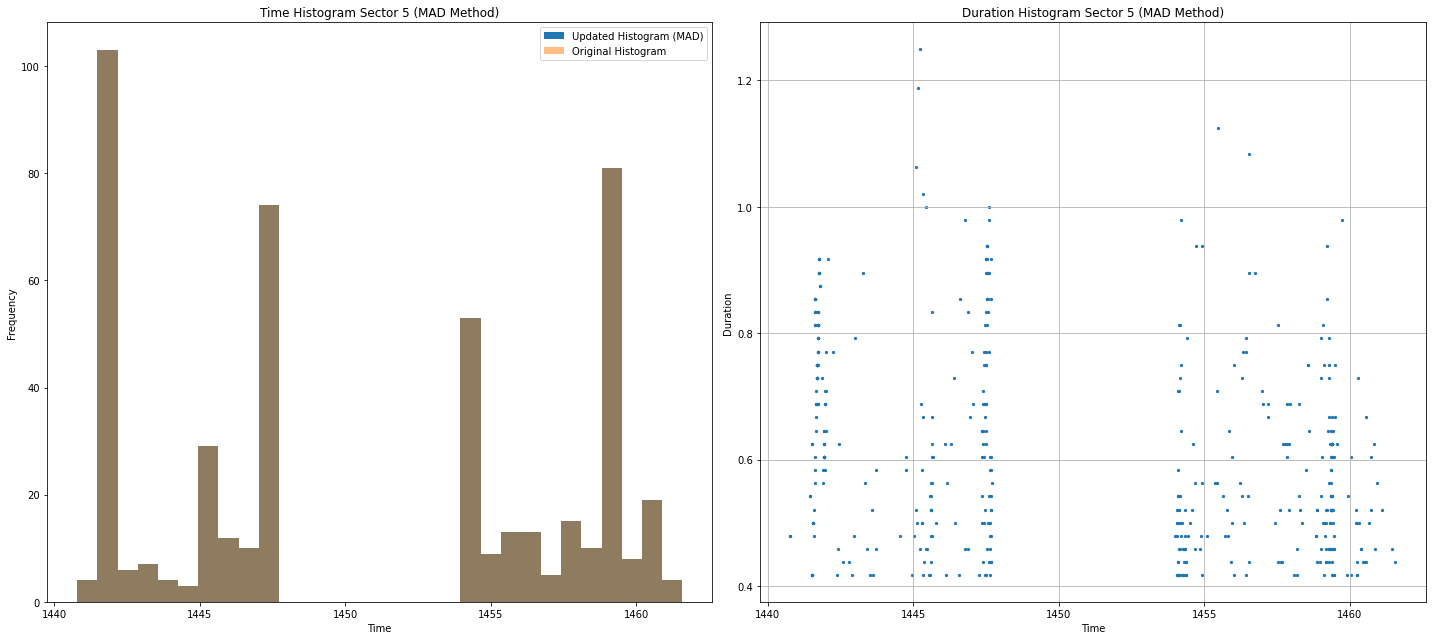

total candidates of Sector 5: 482
total bad lcs: 0
Bins of bad lightcurves:
Dataframe 'sector_6' not found. Moving to the next sector.
Dataframe 'sector_7' not found. Moving to the next sector.
Dataframe 'sector_8' not found. Moving to the next sector.


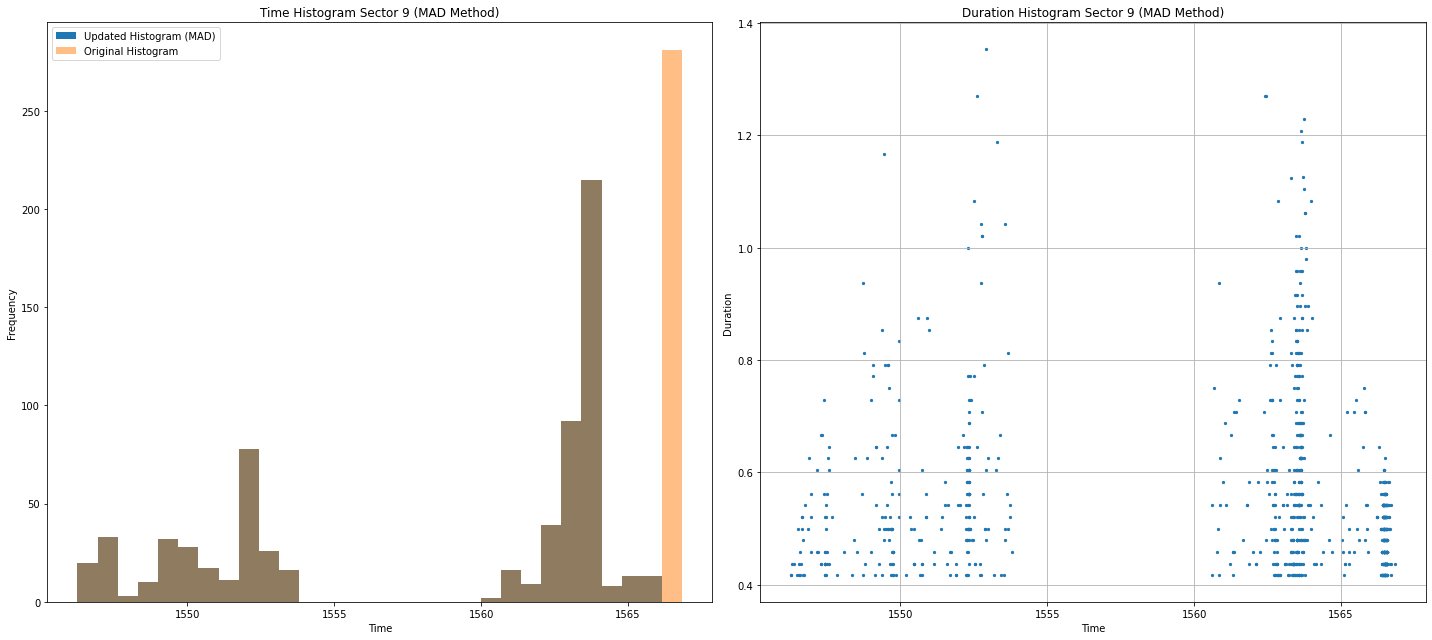

total candidates of Sector 9: 962
total bad lcs: 281
Bins of bad lightcurves:
    Bin Range: 1566.1606566666667 - 1566.84675


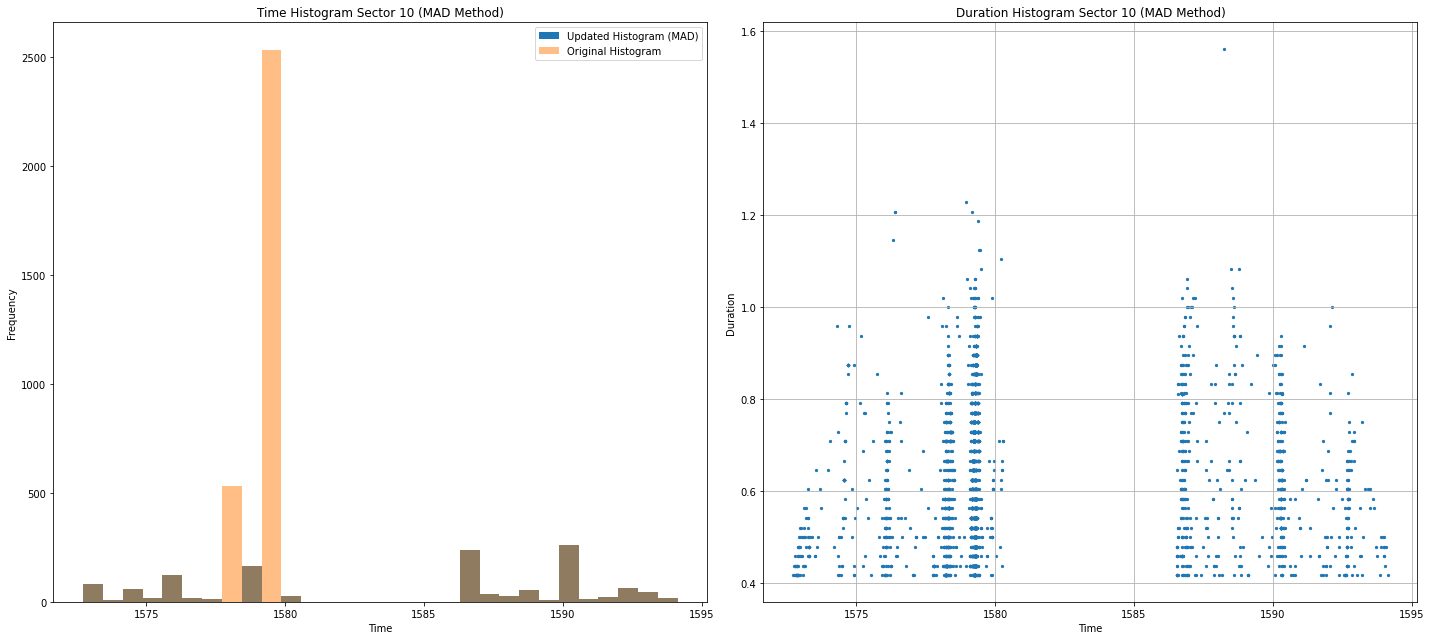

total candidates of Sector 10: 4368
total bad lcs: 3065
Bins of bad lightcurves:
    Bin Range: 1577.7190030000002 - 1578.4329320000002
    Bin Range: 1579.1468610000002 - 1579.8607900000002


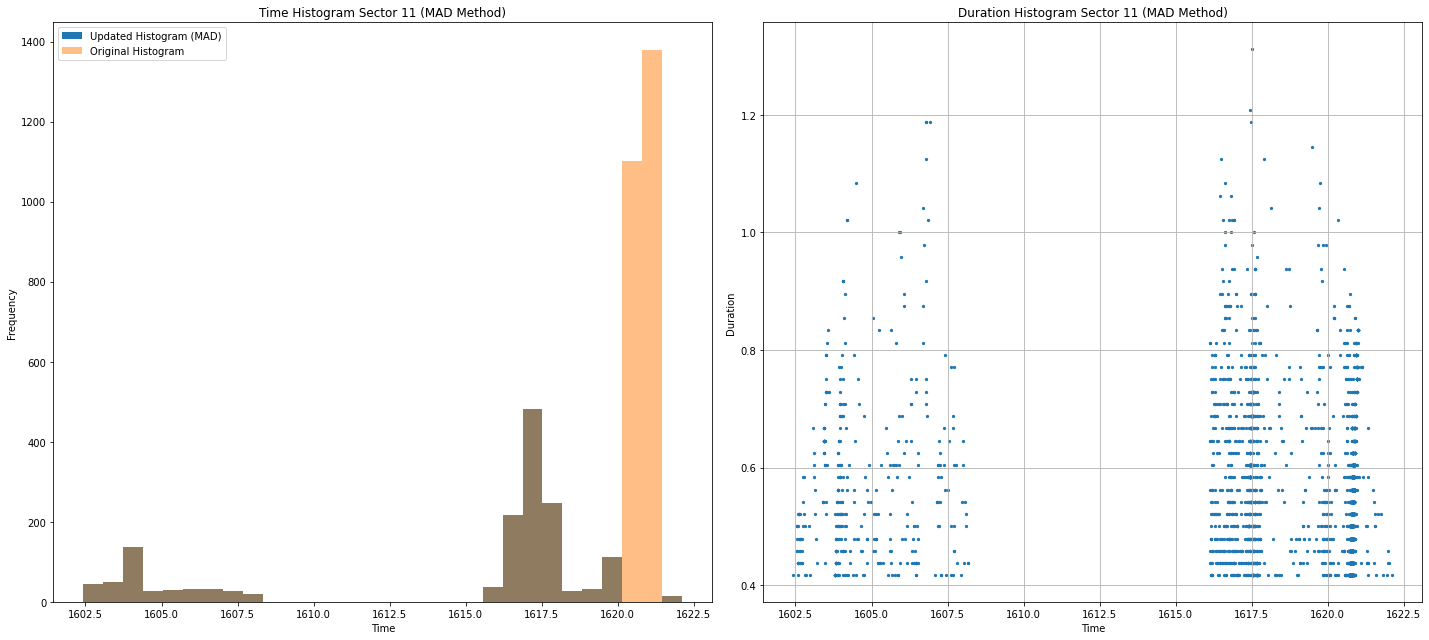

total candidates of Sector 11: 4054
total bad lcs: 2481
Bins of bad lightcurves:
    Bin Range: 1620.149203 - 1620.8054286666666
    Bin Range: 1620.8054286666668 - 1621.4616543333334
Dataframe 'sector_12' not found. Moving to the next sector.
Dataframe 'sector_13' not found. Moving to the next sector.
Dataframe 'sector_14' not found. Moving to the next sector.


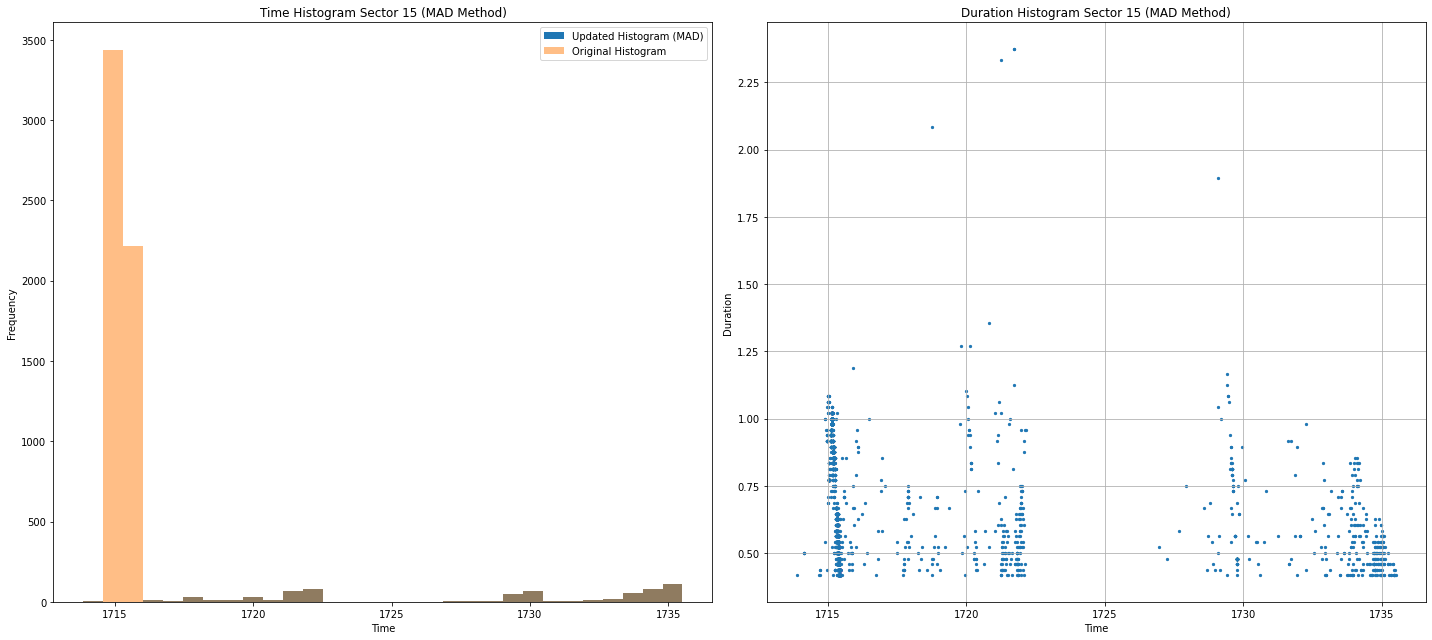

total candidates of Sector 15: 6336
total bad lcs: 5653
Bins of bad lightcurves:
    Bin Range: 1714.589583 - 1715.310976
    Bin Range: 1715.310976 - 1716.032369


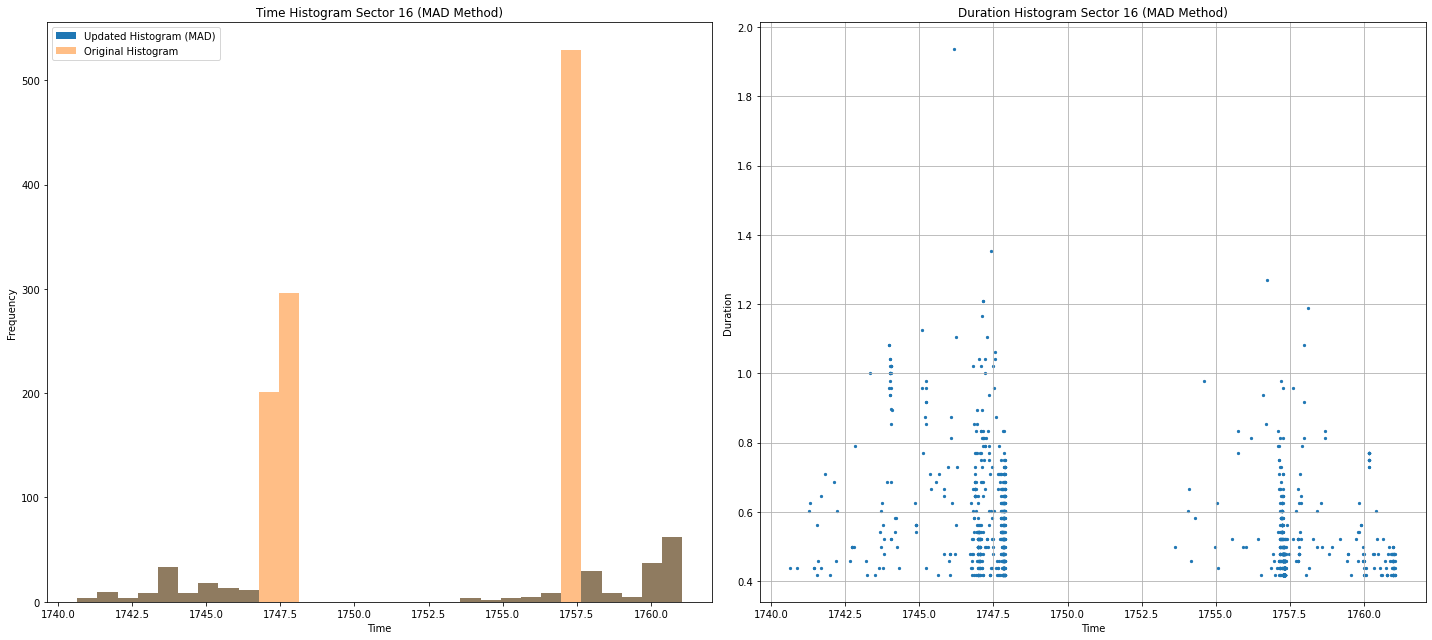

total candidates of Sector 16: 1299
total bad lcs: 1026
Bins of bad lightcurves:
    Bin Range: 1746.774833 - 1747.4549266666666
    Bin Range: 1747.4549266666668 - 1748.1350203333334
    Bin Range: 1756.976238 - 1757.6563316666666


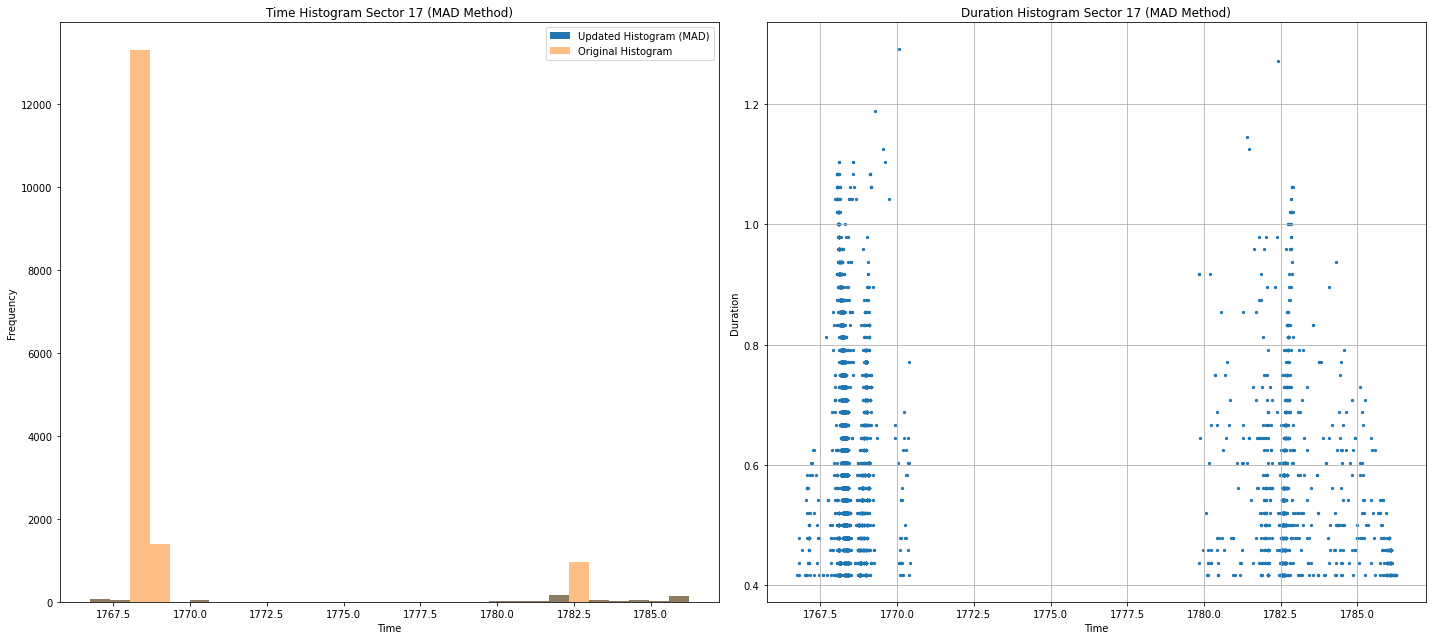

total candidates of Sector 17: 16308
total bad lcs: 15659
Bins of bad lightcurves:
    Bin Range: 1768.0260033333334 - 1768.67662
    Bin Range: 1768.67662 - 1769.3272366666665
    Bin Range: 1782.3395699999999 - 1782.9901866666664


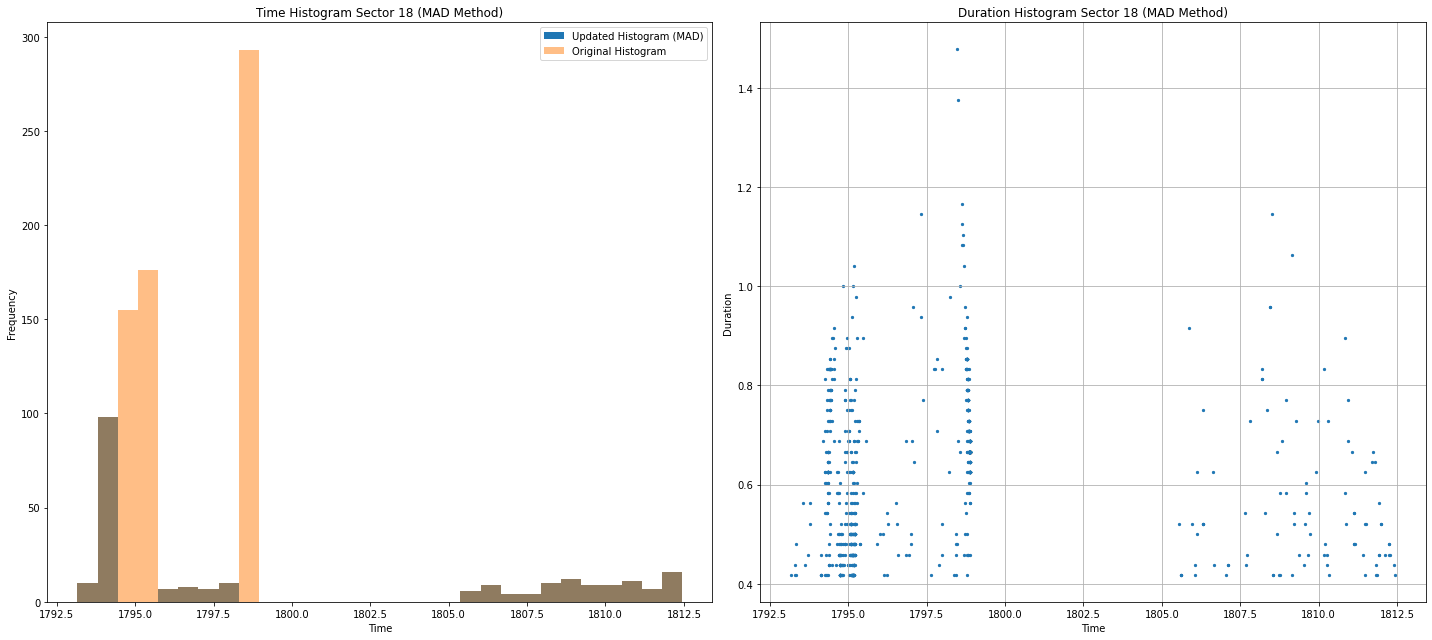

total candidates of Sector 18: 861
total bad lcs: 624
Bins of bad lightcurves:
    Bin Range: 1794.445798 - 1795.088737
    Bin Range: 1795.088737 - 1795.731676
    Bin Range: 1798.3034320000002 - 1798.9463710000002


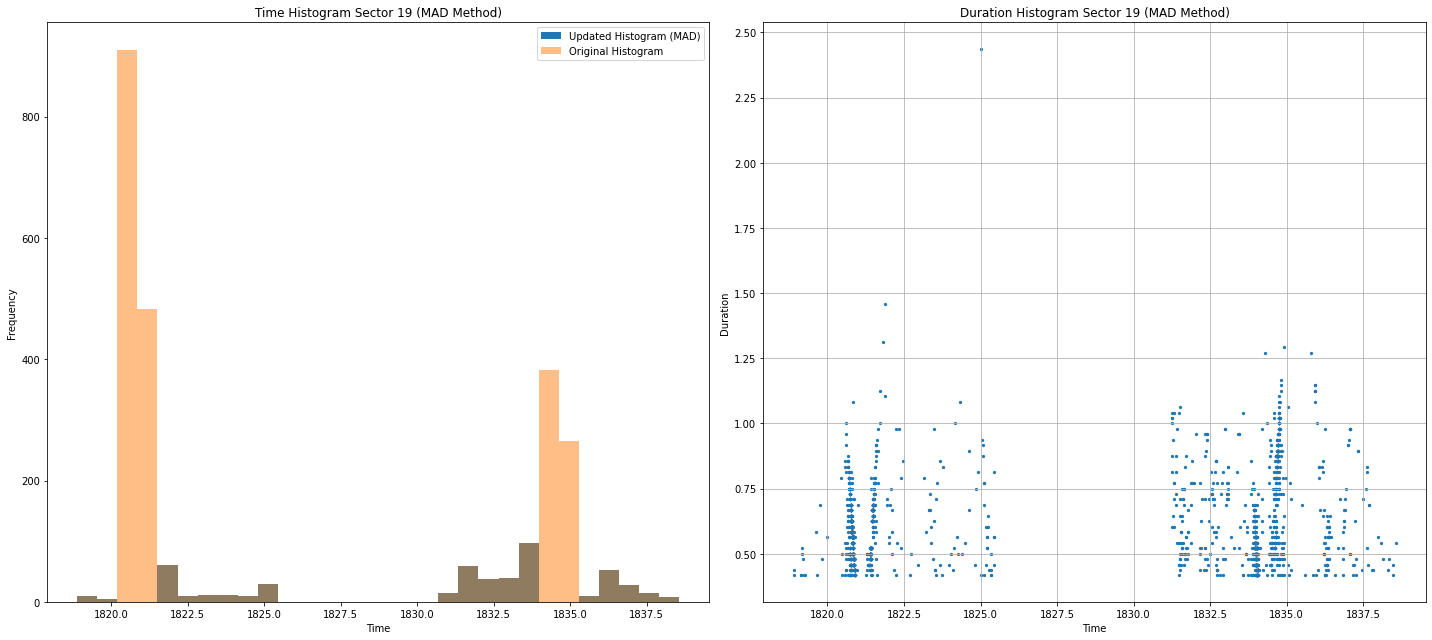

total candidates of Sector 19: 2547
total bad lcs: 2041
Bins of bad lightcurves:
    Bin Range: 1820.2021266666666 - 1820.857665
    Bin Range: 1820.857665 - 1821.5132033333334
    Bin Range: 1833.9684316666667 - 1834.62397
    Bin Range: 1834.6239699999999 - 1835.2795083333333


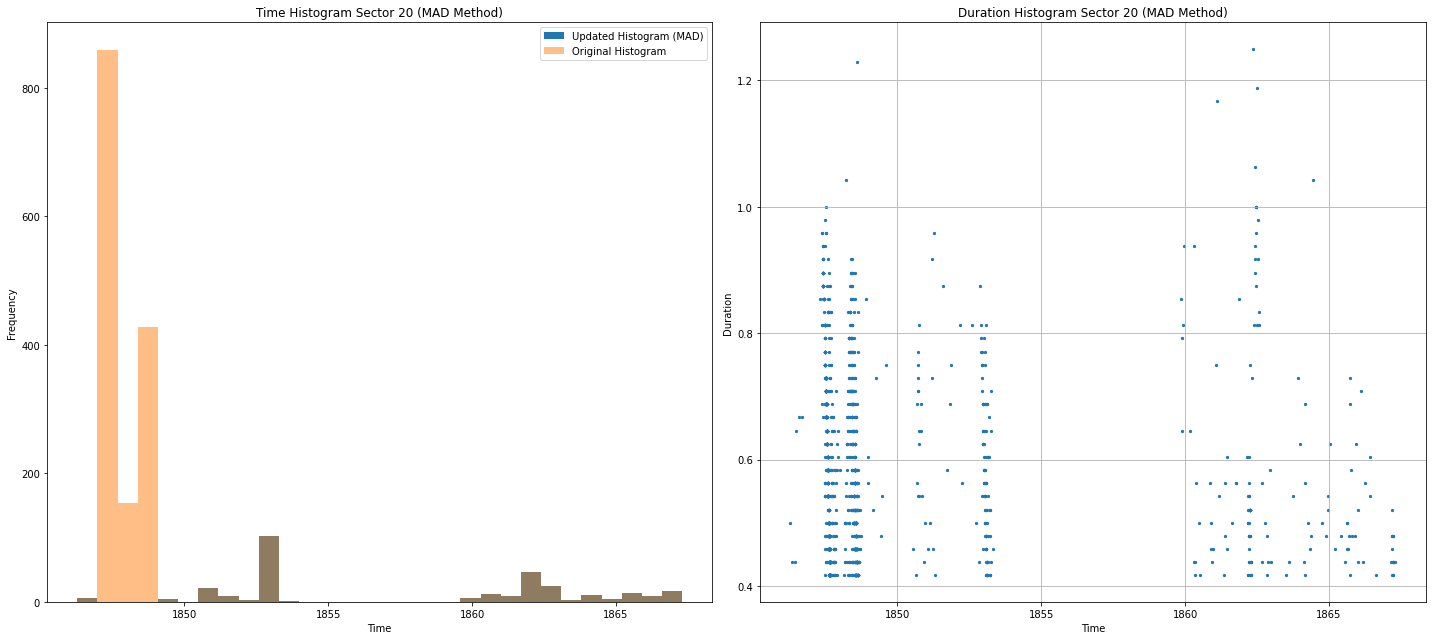

total candidates of Sector 20: 1743
total bad lcs: 1441
Bins of bad lightcurves:
    Bin Range: 1846.984983 - 1847.6856460000001
    Bin Range: 1847.685646 - 1848.386309
    Bin Range: 1848.386309 - 1849.086972


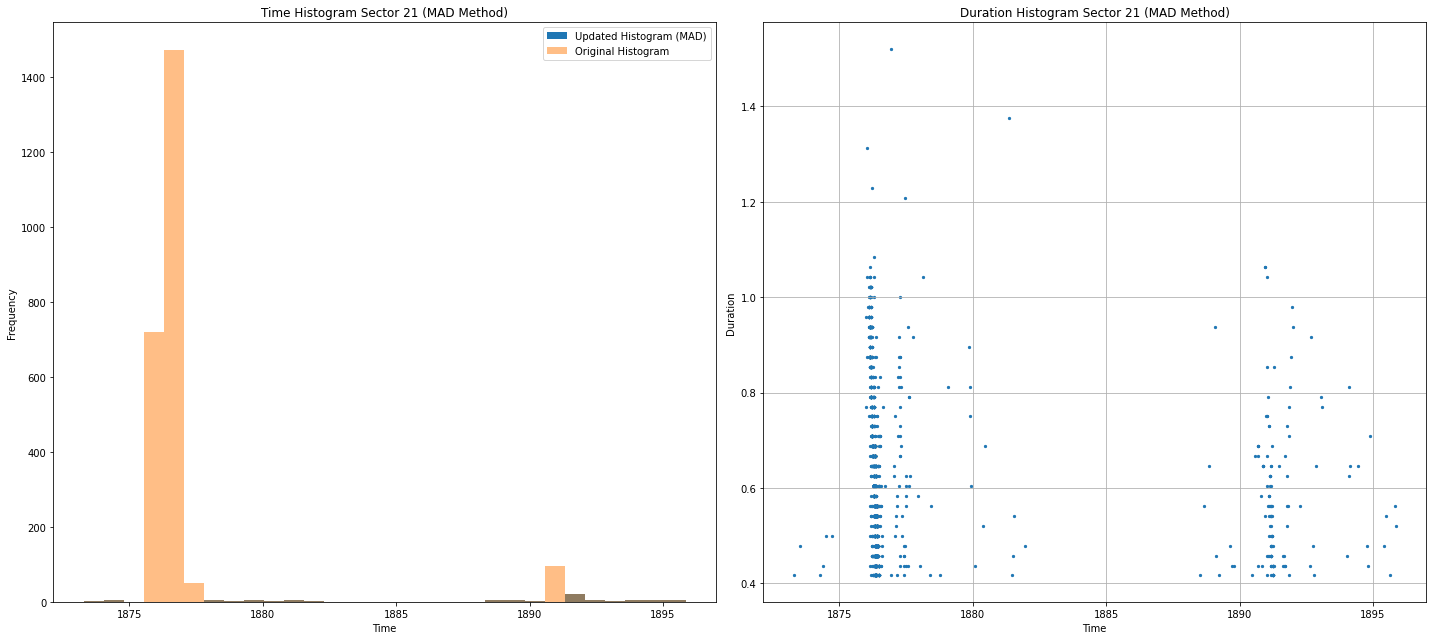

total candidates of Sector 21: 2415
total bad lcs: 2338
Bins of bad lightcurves:
    Bin Range: 1875.537608 - 1876.2897706666668
    Bin Range: 1876.2897706666668 - 1877.0419333333334
    Bin Range: 1877.0419333333334 - 1877.794096
    Bin Range: 1890.5808613333334 - 1891.333024


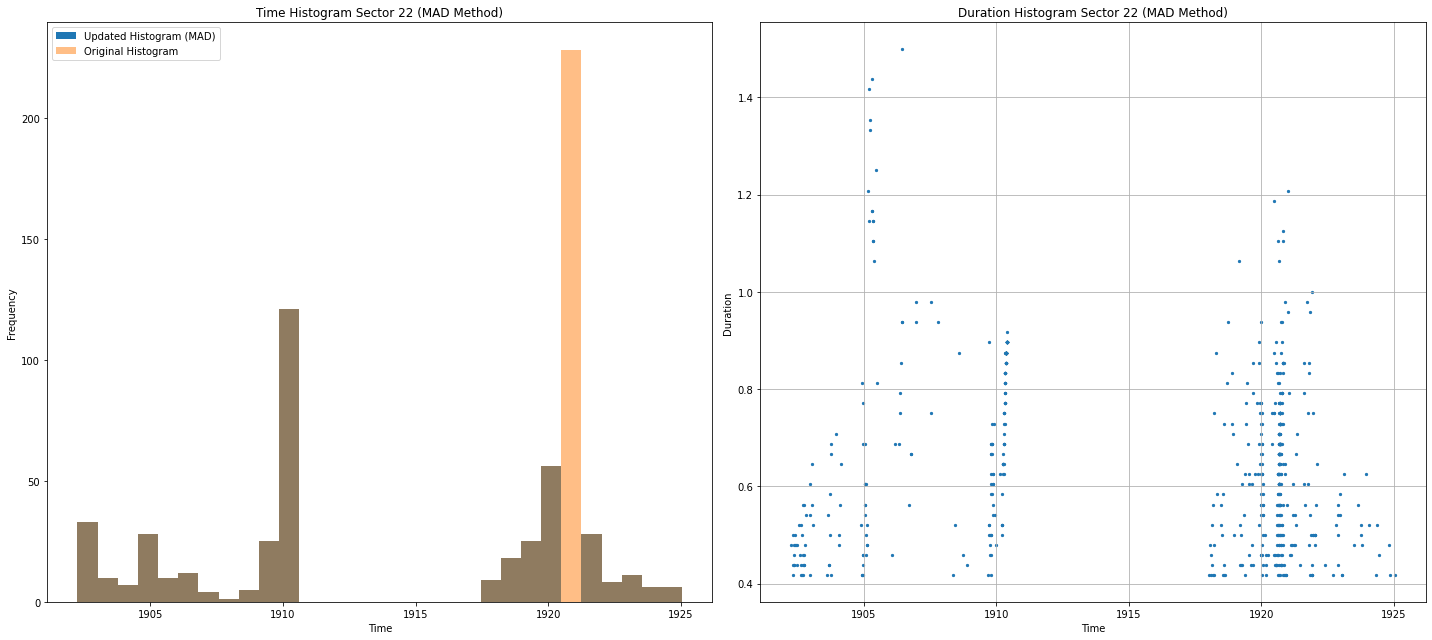

total candidates of Sector 22: 651
total bad lcs: 228
Bins of bad lightcurves:
    Bin Range: 1920.495112 - 1921.2555266666668


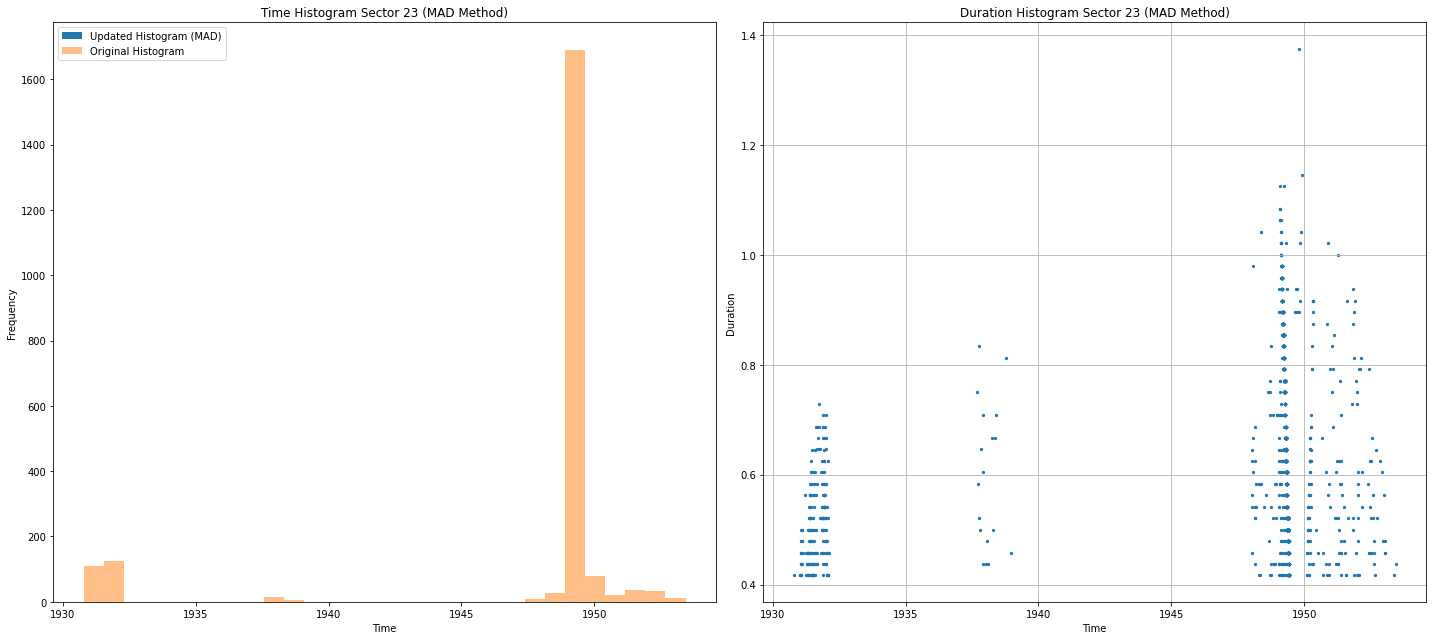

total candidates of Sector 23: 2162
total bad lcs: 2162
Bins of bad lightcurves:
    Bin Range: 1930.78341 - 1931.5383873333333
    Bin Range: 1931.5383873333333 - 1932.2933646666665
    Bin Range: 1937.578206 - 1938.3331833333332
    Bin Range: 1938.3331833333334 - 1939.0881606666667
    Bin Range: 1947.3929113333334 - 1948.1478886666666
    Bin Range: 1948.1478886666666 - 1948.902866
    Bin Range: 1948.902866 - 1949.6578433333332
    Bin Range: 1949.6578433333334 - 1950.4128206666667
    Bin Range: 1950.4128206666667 - 1951.167798
    Bin Range: 1951.167798 - 1951.9227753333332
    Bin Range: 1951.9227753333332 - 1952.6777526666665
    Bin Range: 1952.6777526666667 - 1953.43273


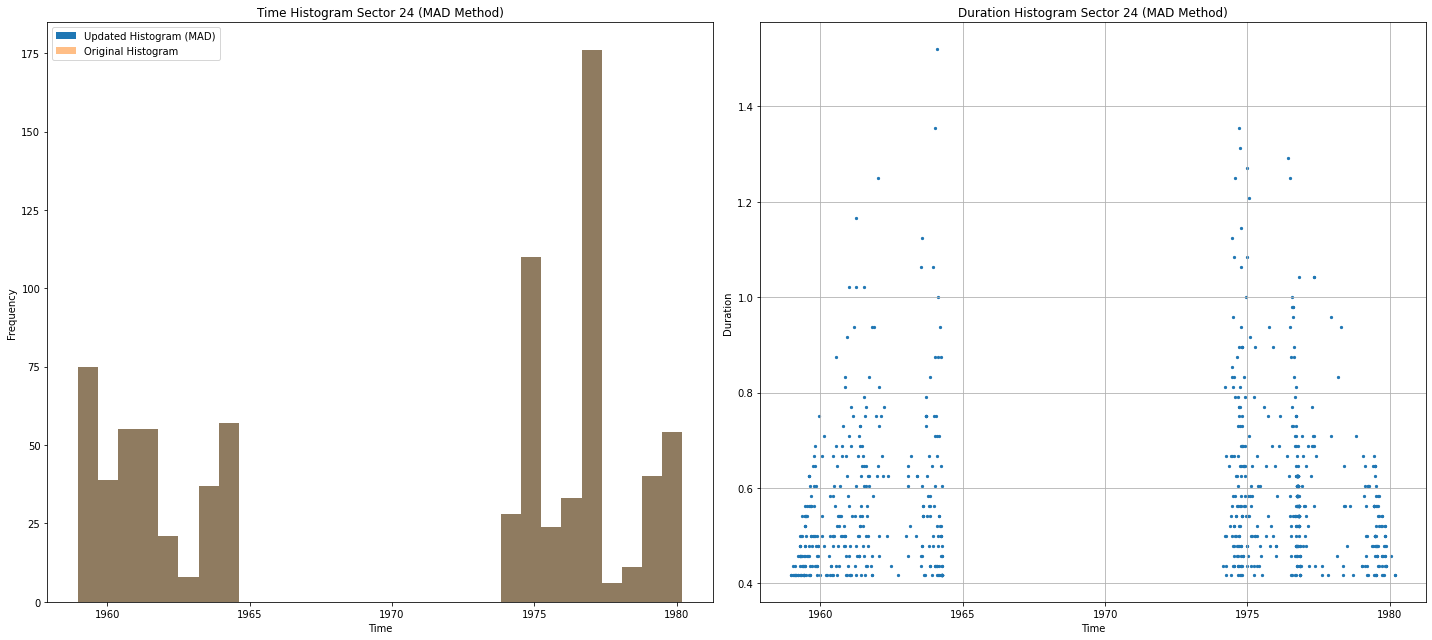

total candidates of Sector 24: 829
total bad lcs: 0
Bins of bad lightcurves:


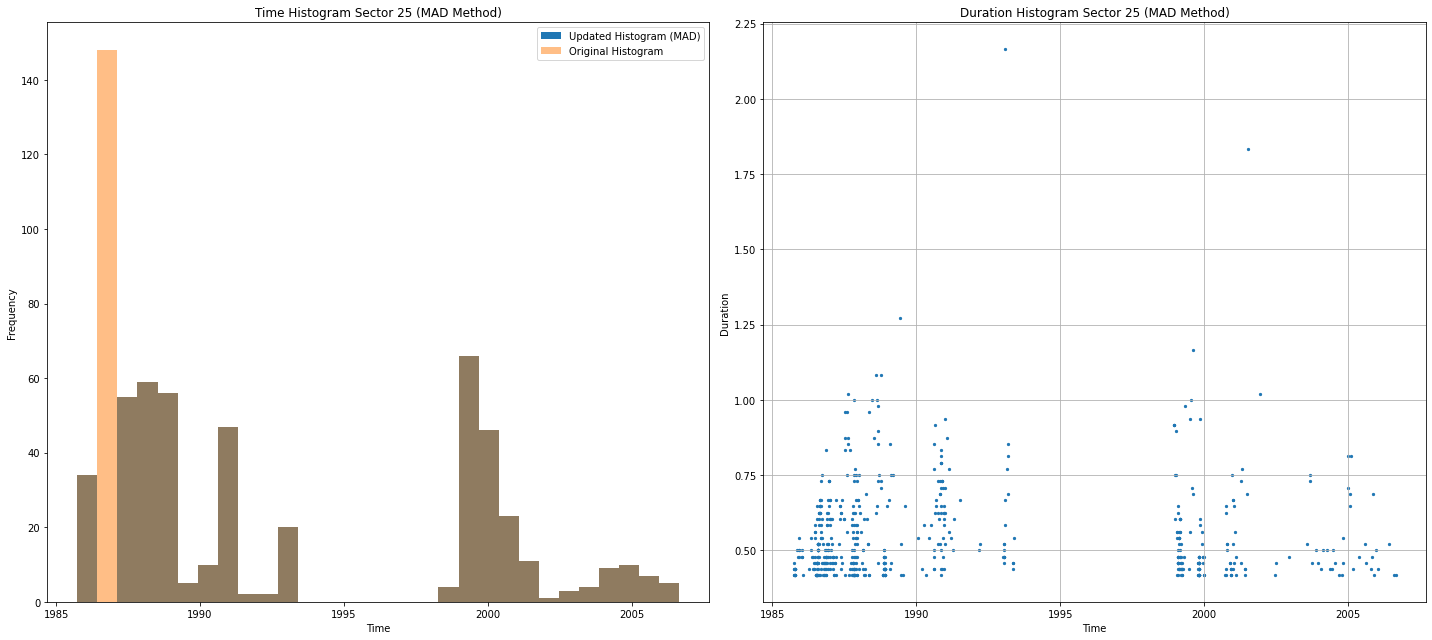

total candidates of Sector 25: 627
total bad lcs: 148
Bins of bad lightcurves:
    Bin Range: 1986.4338163333332 - 1987.1305726666665


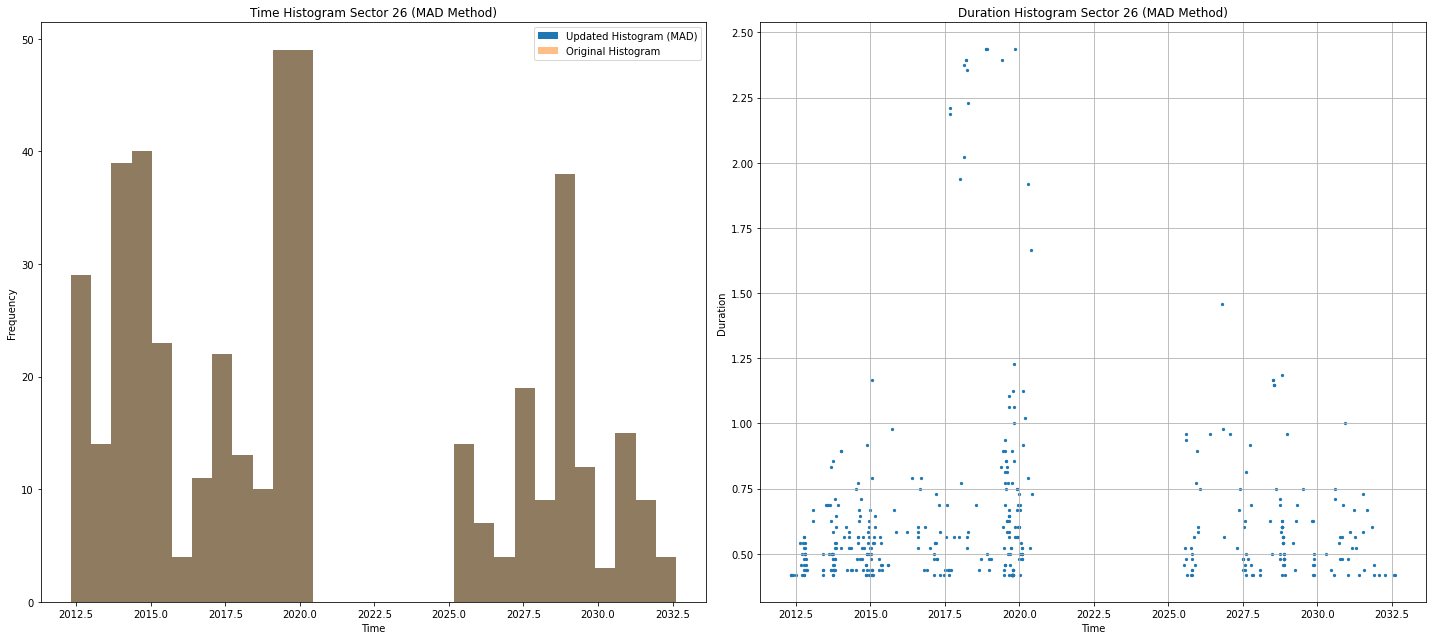

total candidates of Sector 26: 437
total bad lcs: 0
Bins of bad lightcurves:


In [4]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1,27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    try:
        # Access the dataframe using globals() and the constructed variable name
        data = globals()[dataframe_name]
    except KeyError:
        # Handle the case where the dataframe variable doesn't exist
        print(f"Dataframe '{dataframe_name}' not found. Moving to the next sector.")
        continue
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.01)].index, inplace=True)
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=30)
    
    # Method 1: Median Absolute Deviation (MAD)
    ## calculate median, mad, and then mad threshold
    median = np.median(time_histogram)
    mad = np.median(np.abs(time_histogram - median)) # median of absolute deviations from the median
    mad_threshold = 20 * mad
    mad_anomalous_bins = [i for i, value in enumerate(time_histogram) if np.abs(value - median) > mad_threshold] # index of bins of the anomalous data
    
    # bins of anomalous data
    anomalous_bins = np.abs(time_histogram - median) > mad_threshold
    
    # Calculate the counts in the anomalous bins
    anomalous_counts = time_histogram[anomalous_bins]
    total_anomalous_count = np.sum(anomalous_counts)

    
    # Extract the bin edges corresponding to the anomalous bins
    anomalous_bin_edges = bin_edges[:-1][anomalous_bins]

    # Calculate the left edge of the anomalous bins
    anomalous_bin_left_edges = anomalous_bin_edges
    
    # Calculate the width of each bin
    bin_width = bin_edges[1] - bin_edges[0]

    # Calculate the right edge of the anomalous bins
    anomalous_bin_right_edges = anomalous_bin_edges + bin_width

    for i in mad_anomalous_bins:
        time_histogram[i] = 0  # Set to zero or any other appropriate value
        
    # Create a boolean mask to identify rows in the DataFrame that belong to anomalous bins
    anomalous_mask = np.zeros(len(data_new), dtype=bool)

    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        # Check if 'time' values in each row fall within the current anomalous bin
        anomalous_mask |= (data_new['time'] >= left_bin) & (data_new['time'] <= right_bin)

    # Invert the mask to get rows that are NOT in anomalous bins
    non_anomalous_rows = ~anomalous_mask
    # Filter your DataFrame to keep only non-anomalous rows
    
    #data_to_export = data_new[~(data_new.time >= 1948.77439) & (data_new.time <= 1949.5188366666666)] 
    
    
    data_to_export = data_new[non_anomalous_rows]    
    
    
    #try:
    #    os.makedirs('../outputs_updated/')
    #except FileExistsError:
    #    pass
    #data_to_export['abs_path'] = data_to_export['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
    #data_to_export.to_csv(f'../outputs_updated/s{sector}.txt',index=False)


    # Create a subplot
    fig, ax = plt.subplots(1,2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    
    # Plot the original 'data_new.time' histogram
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    
    ax[1].scatter(data_new.time,data_new.duration,s=5)
    ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    # Show the subplot
    plt.show()
                           
    print(f"total candidates of Sector {sector}: {len(data_new)}")
    print(f"total bad lcs: {total_anomalous_count}")
    print("Bins of bad lightcurves:")
    for left_bin, right_bin in zip(anomalous_bin_left_edges, anomalous_bin_right_edges):
        print(f"    Bin Range: {left_bin} - {right_bin}")



## Iterative MAD

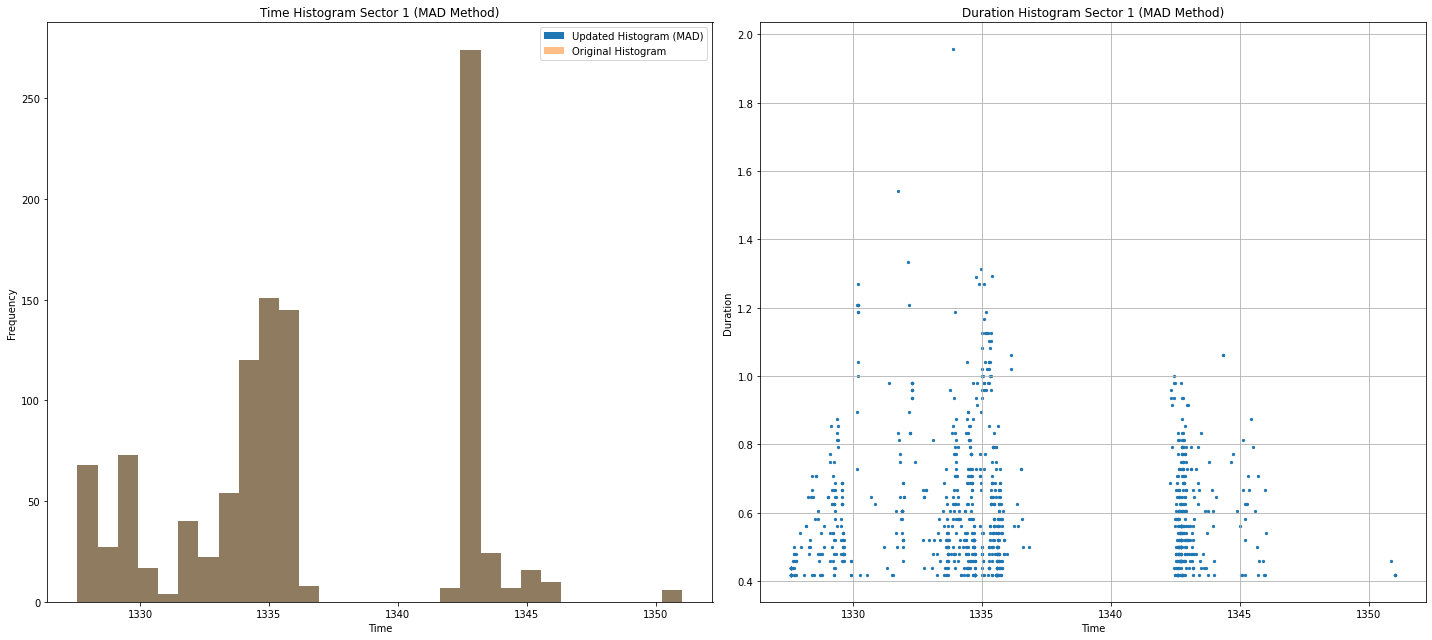

total candidates of Sector 1: 1073


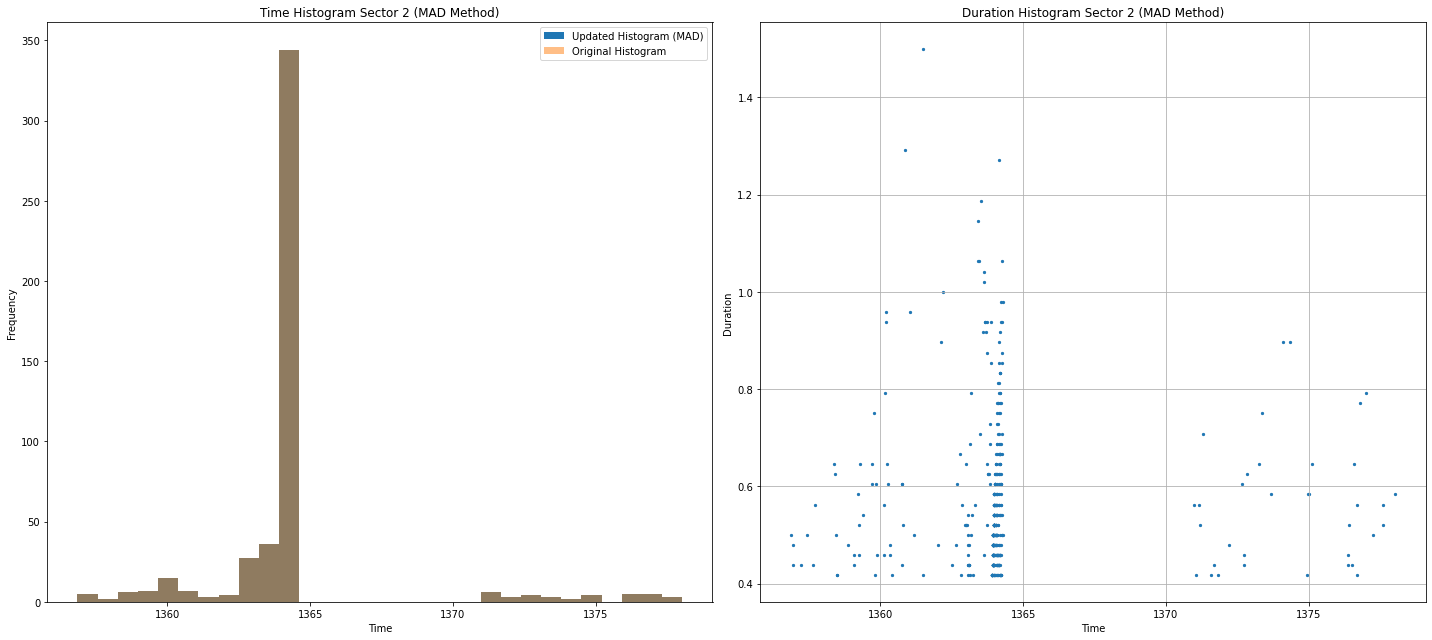

total candidates of Sector 2: 491


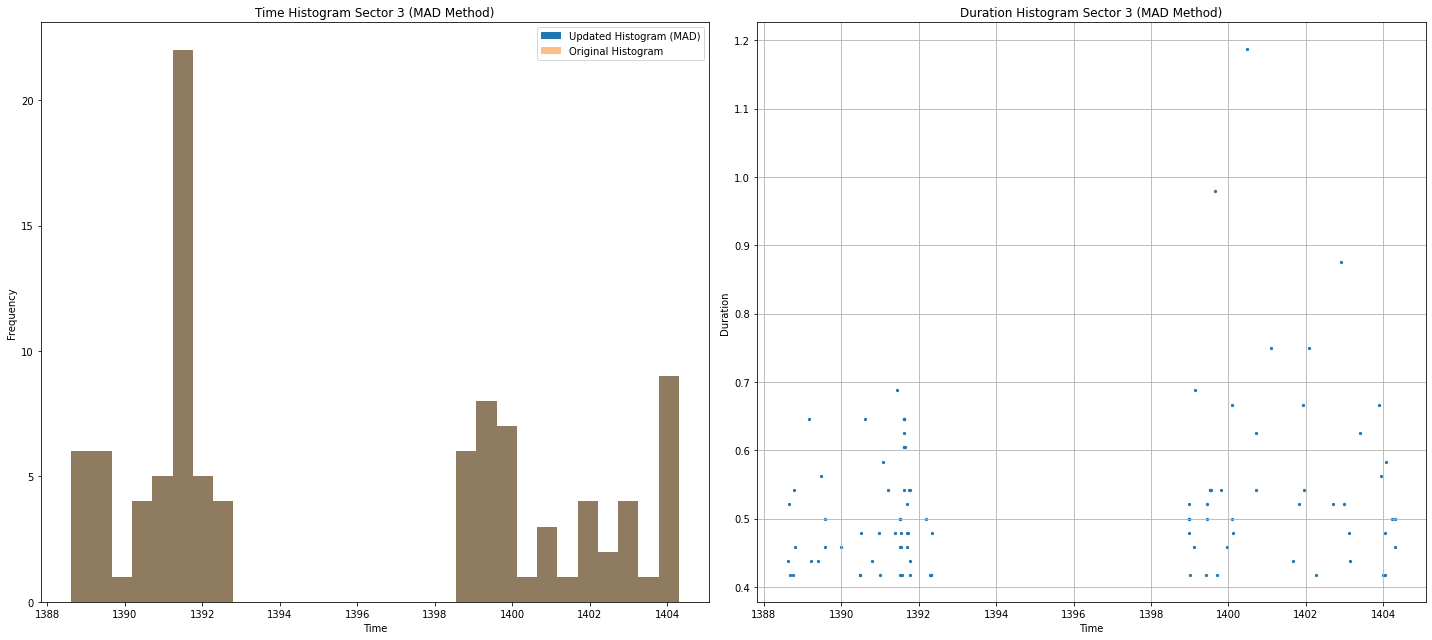

total candidates of Sector 3: 99


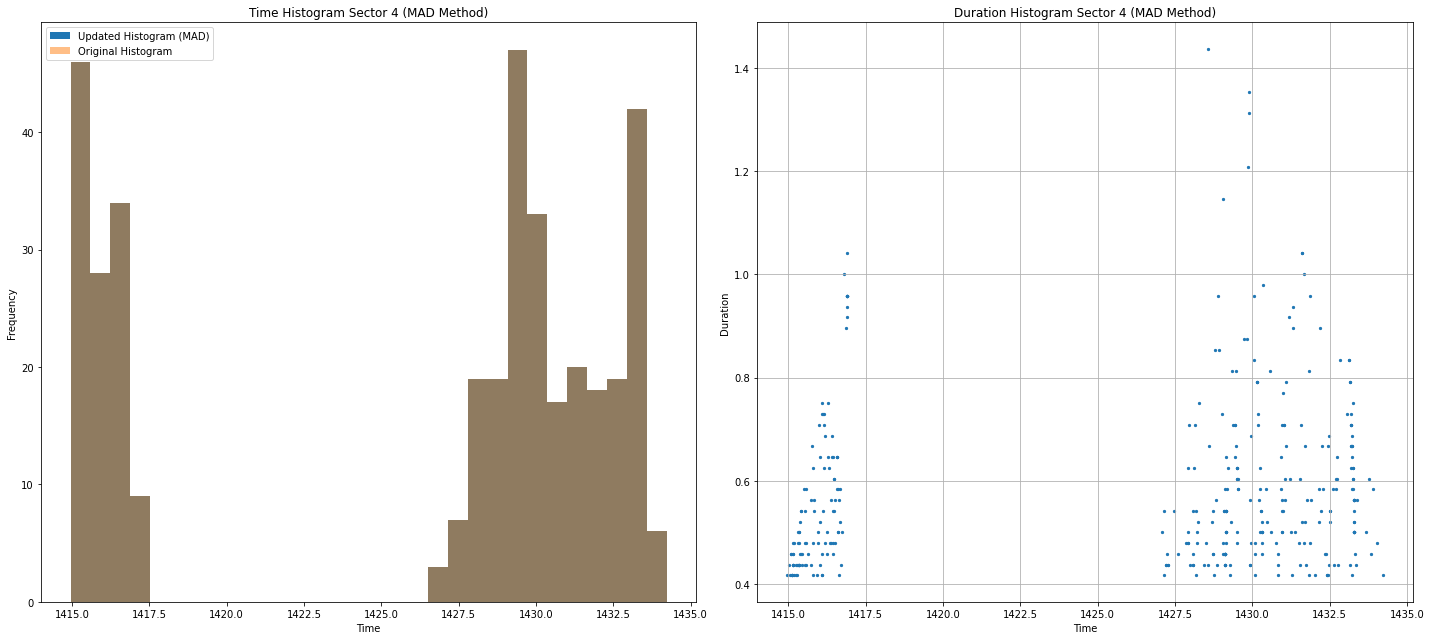

total candidates of Sector 4: 367


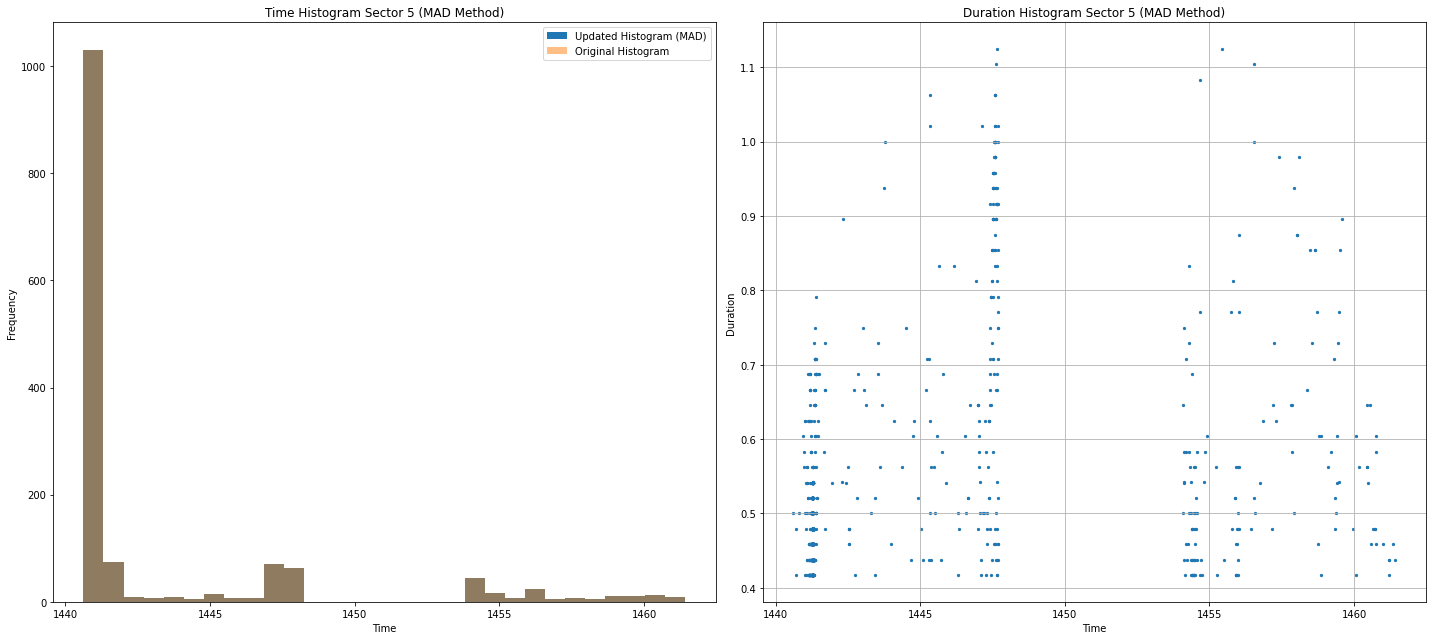

total candidates of Sector 5: 1453


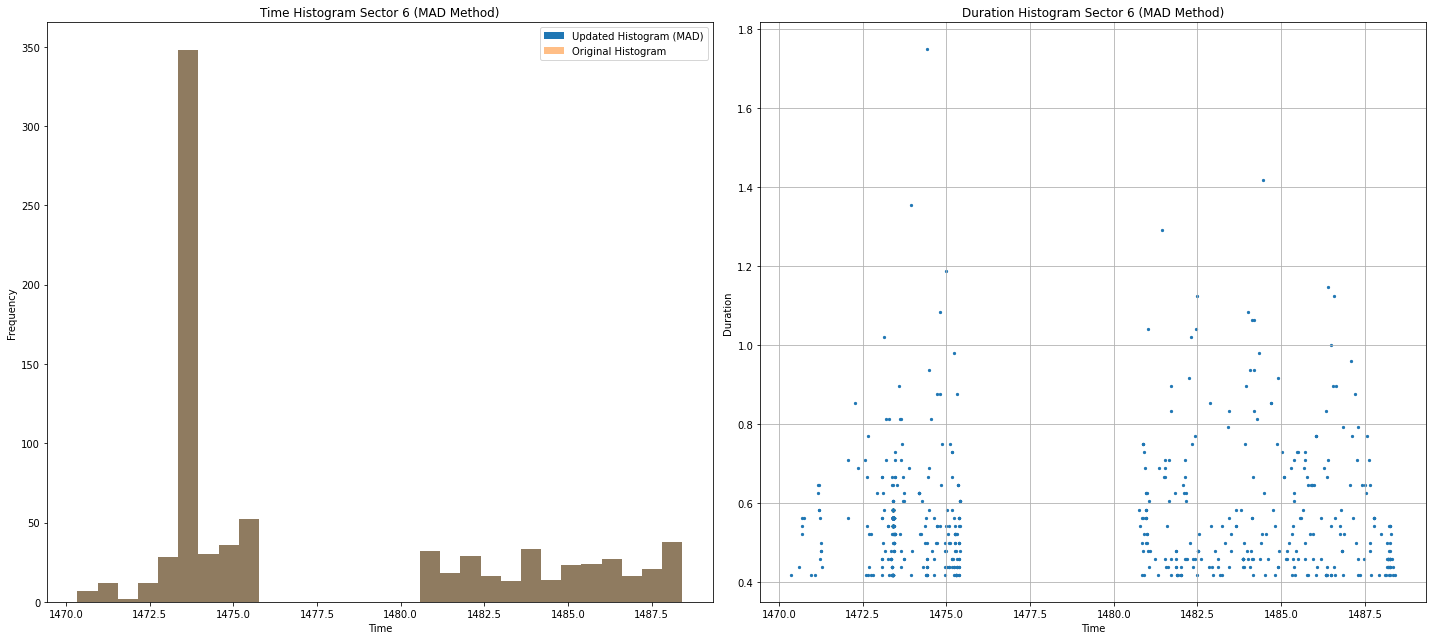

total candidates of Sector 6: 831


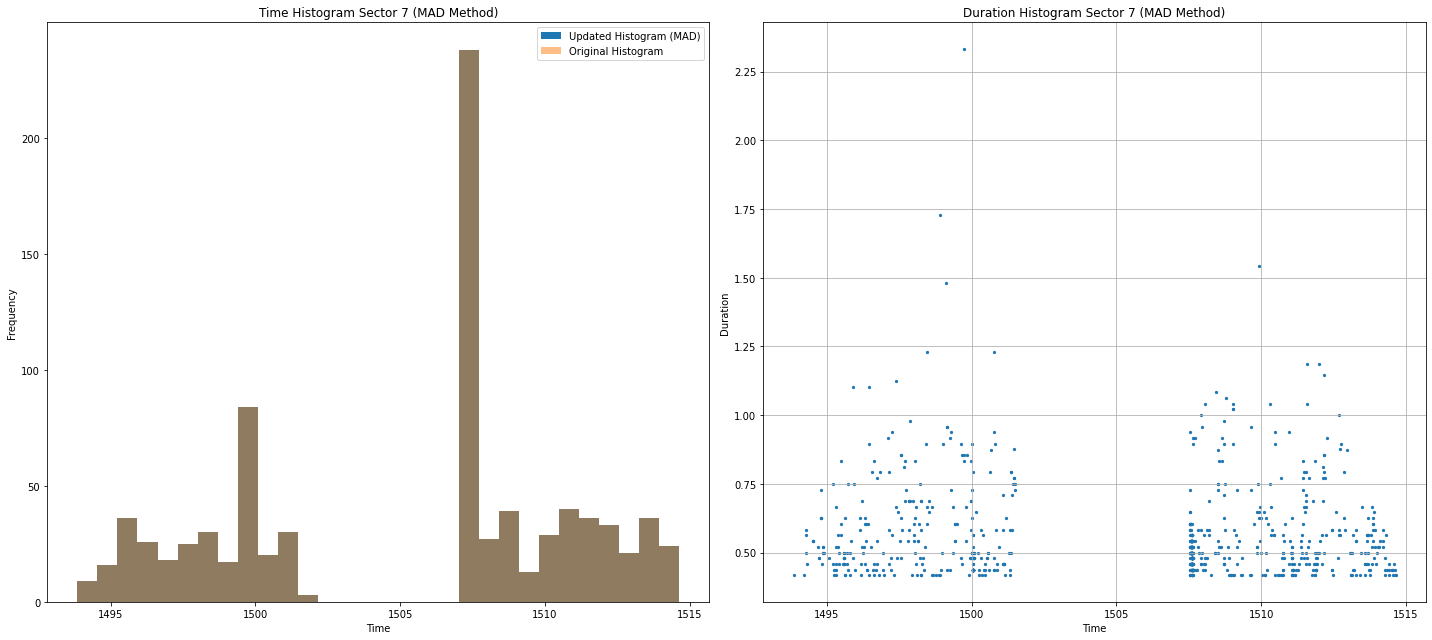

total candidates of Sector 7: 850


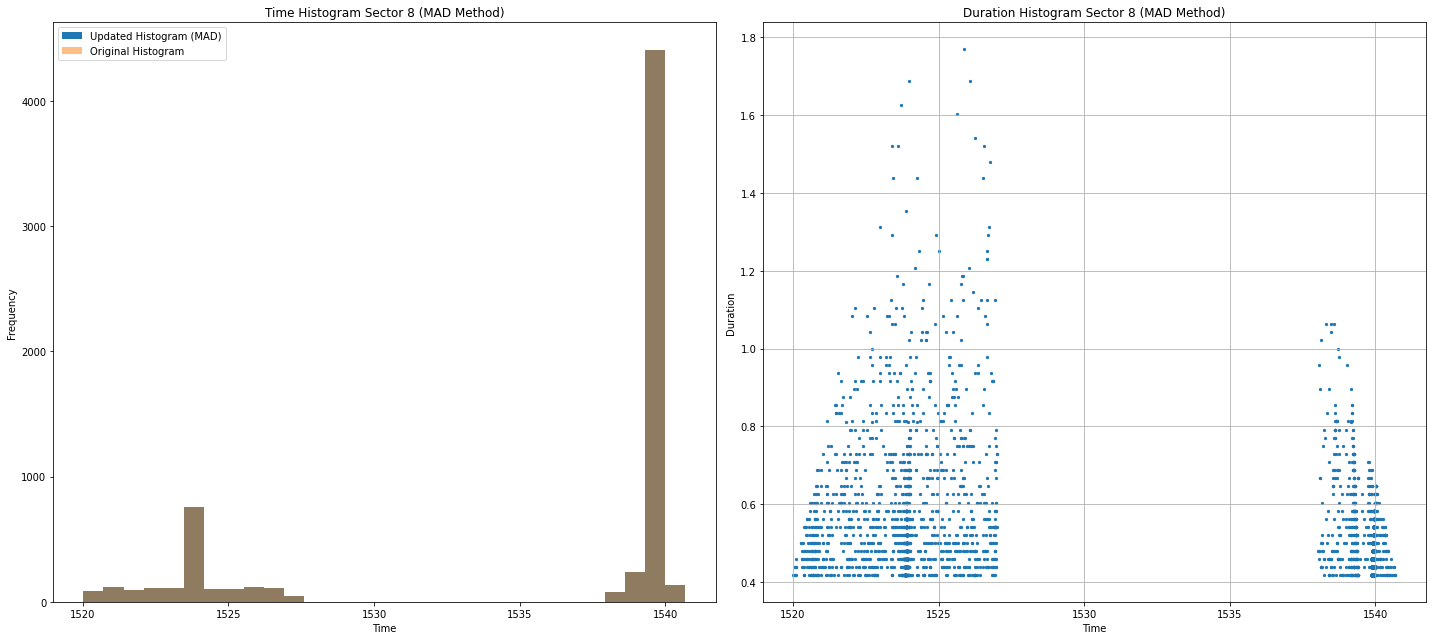

total candidates of Sector 8: 6610


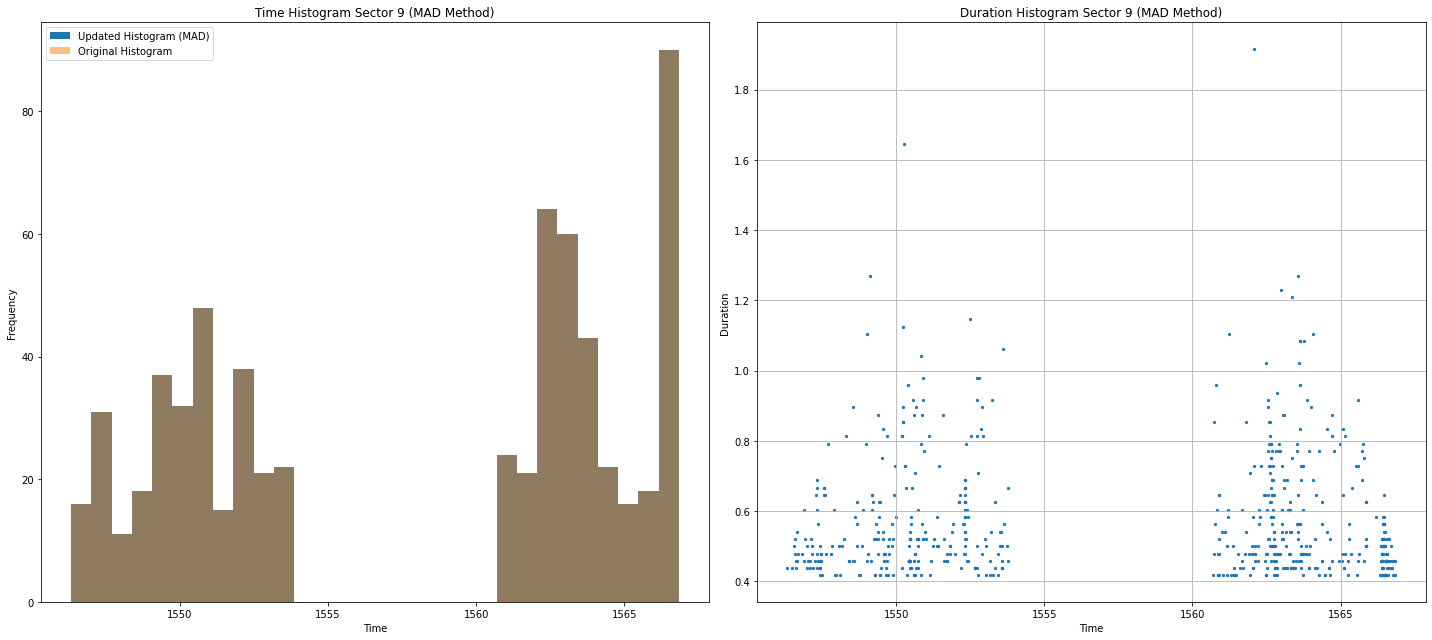

total candidates of Sector 9: 647


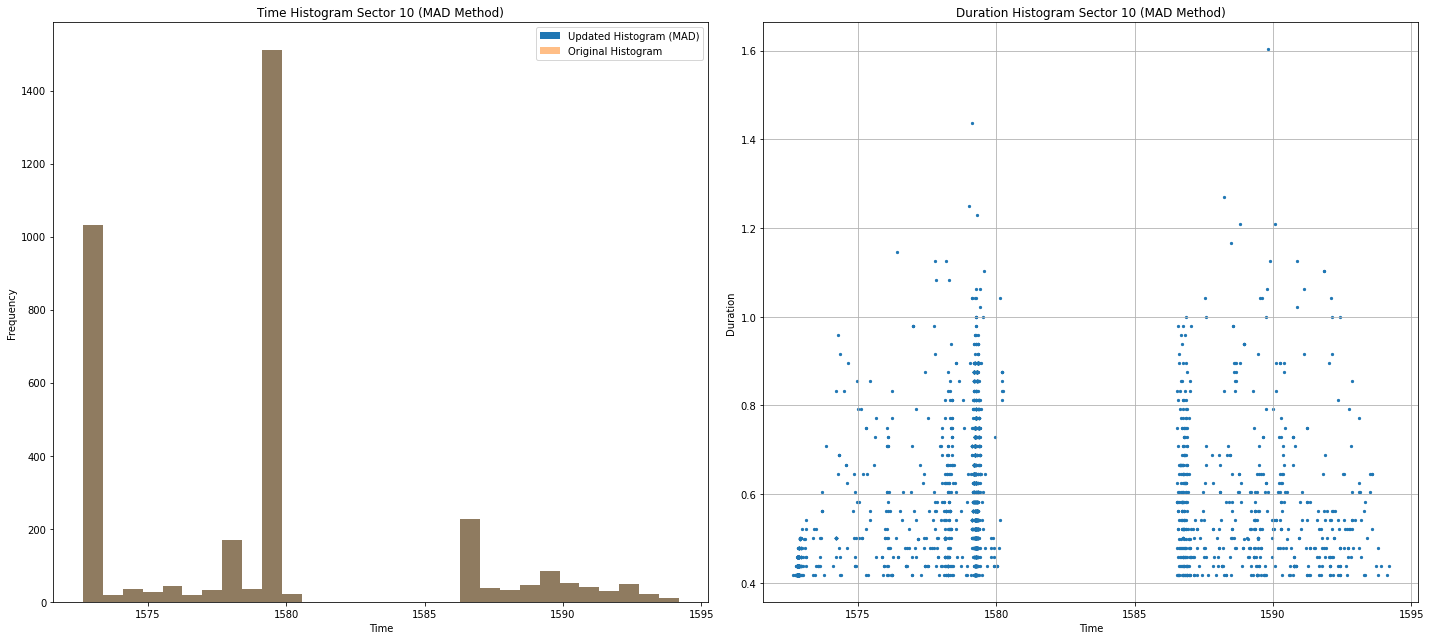

total candidates of Sector 10: 3572


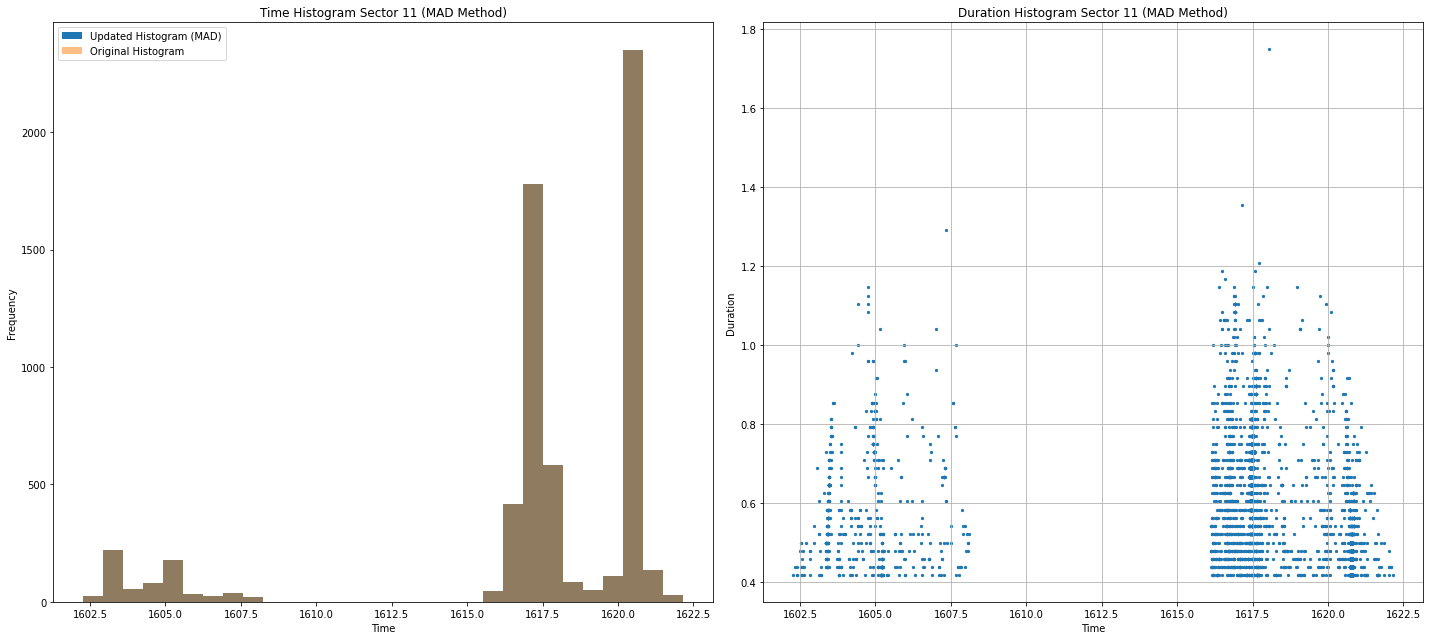

total candidates of Sector 11: 6258


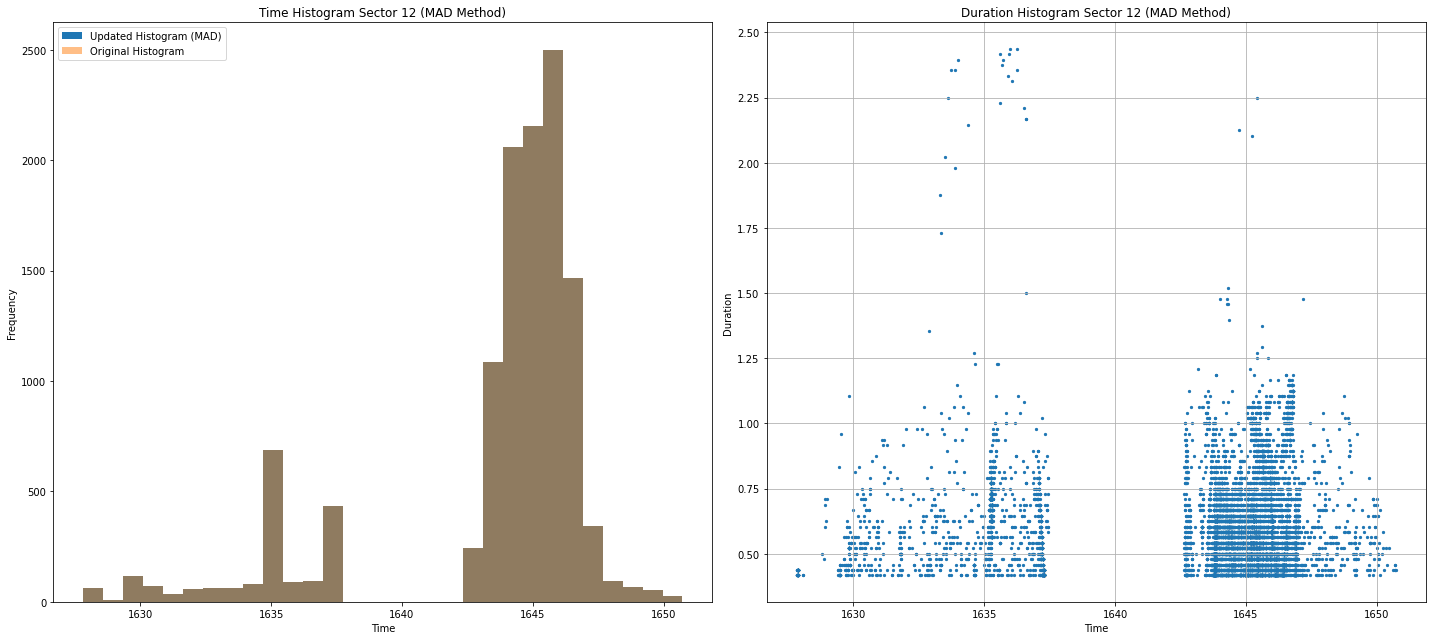

total candidates of Sector 12: 11957


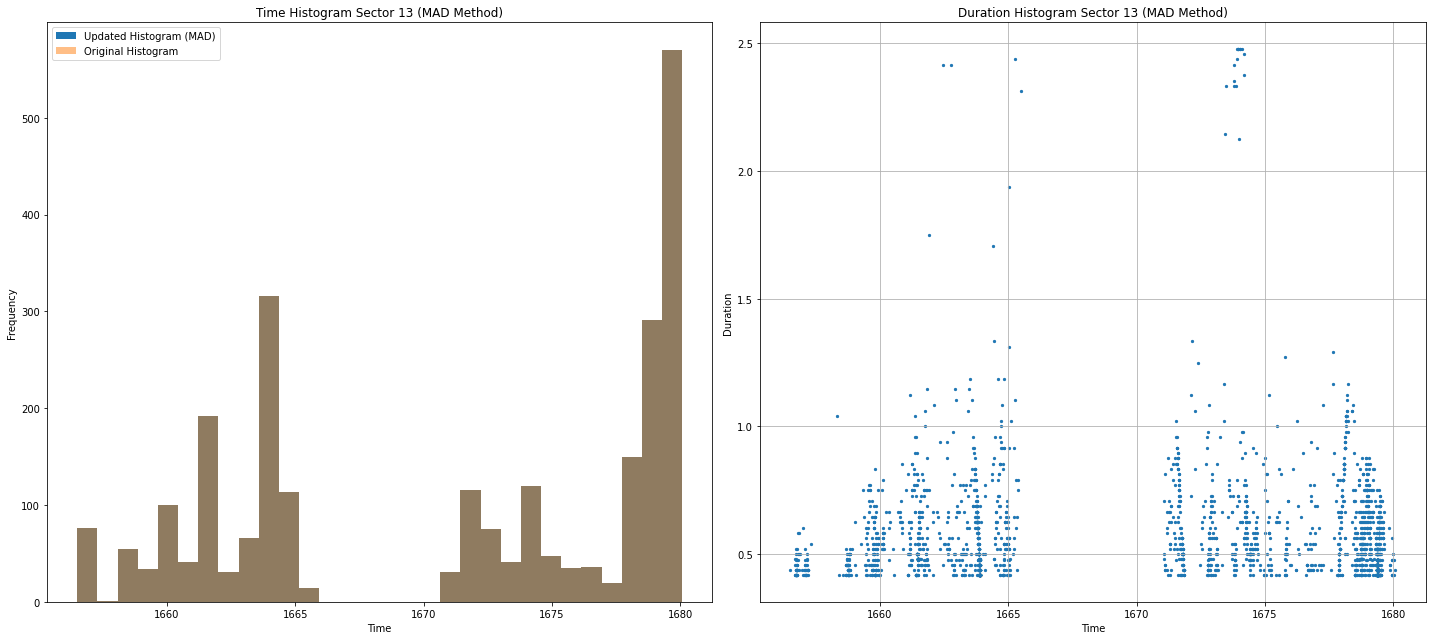

total candidates of Sector 13: 2570


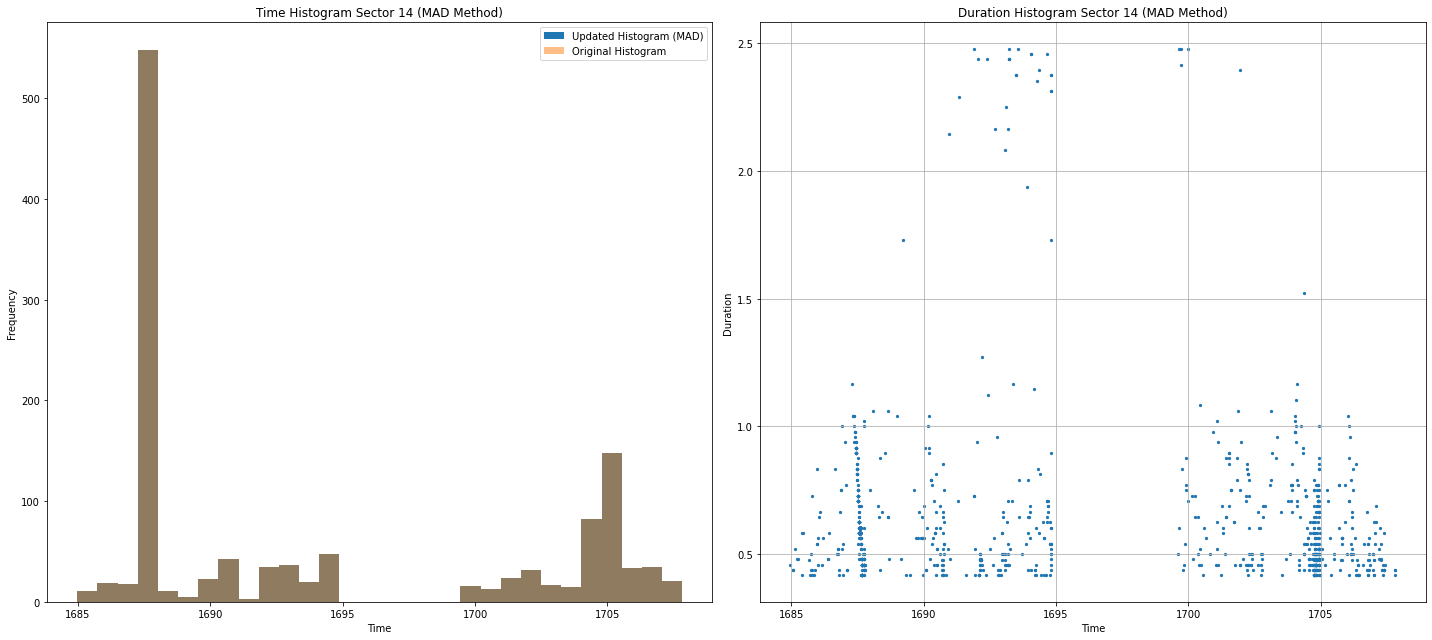

total candidates of Sector 14: 1257


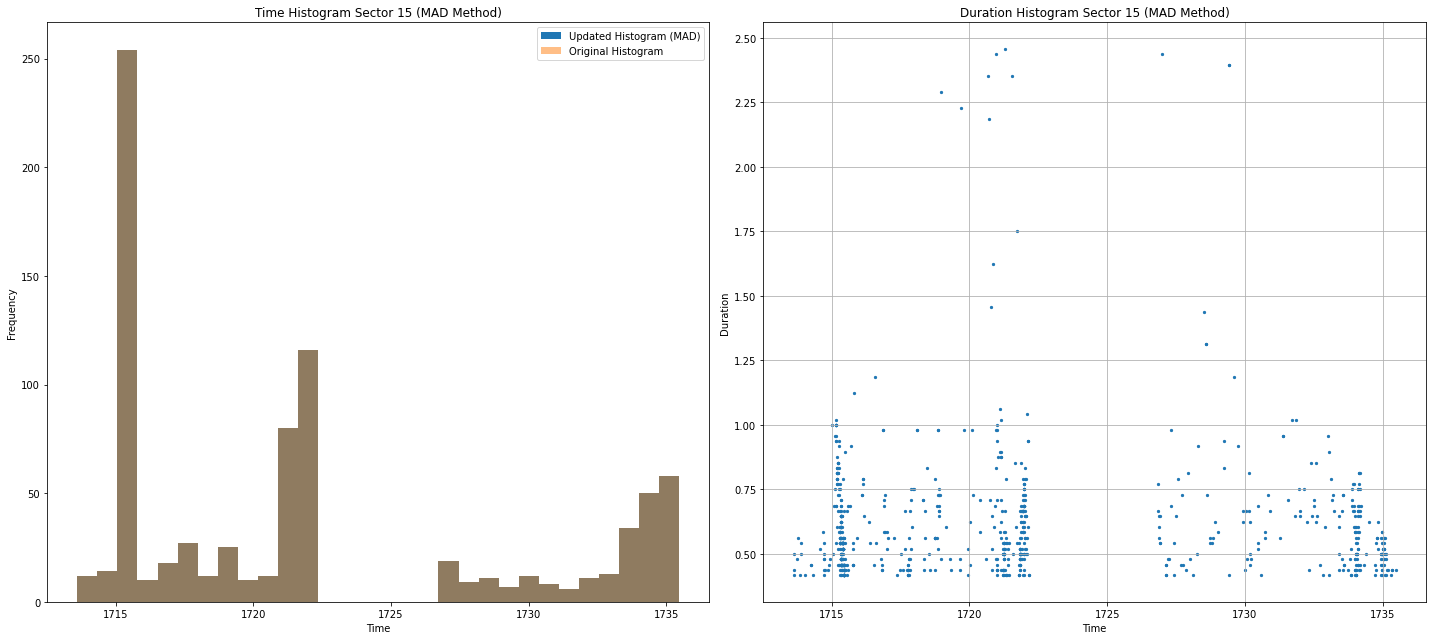

total candidates of Sector 15: 828


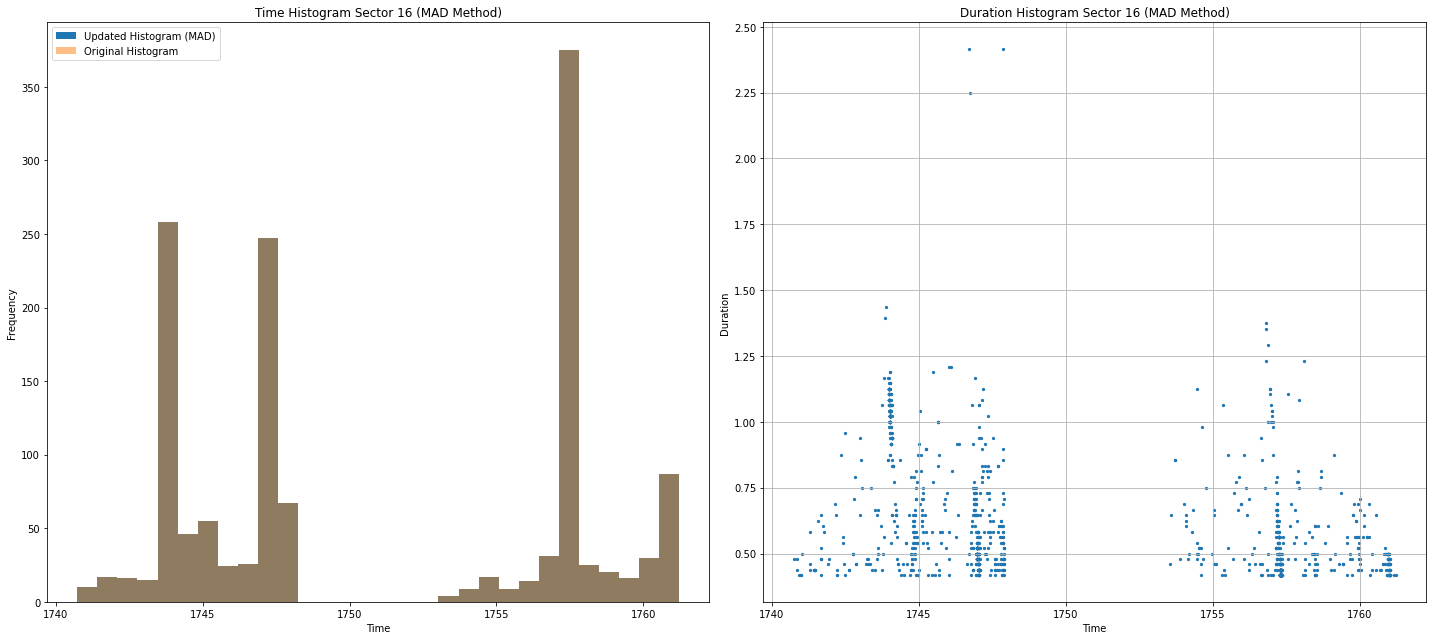

total candidates of Sector 16: 1418


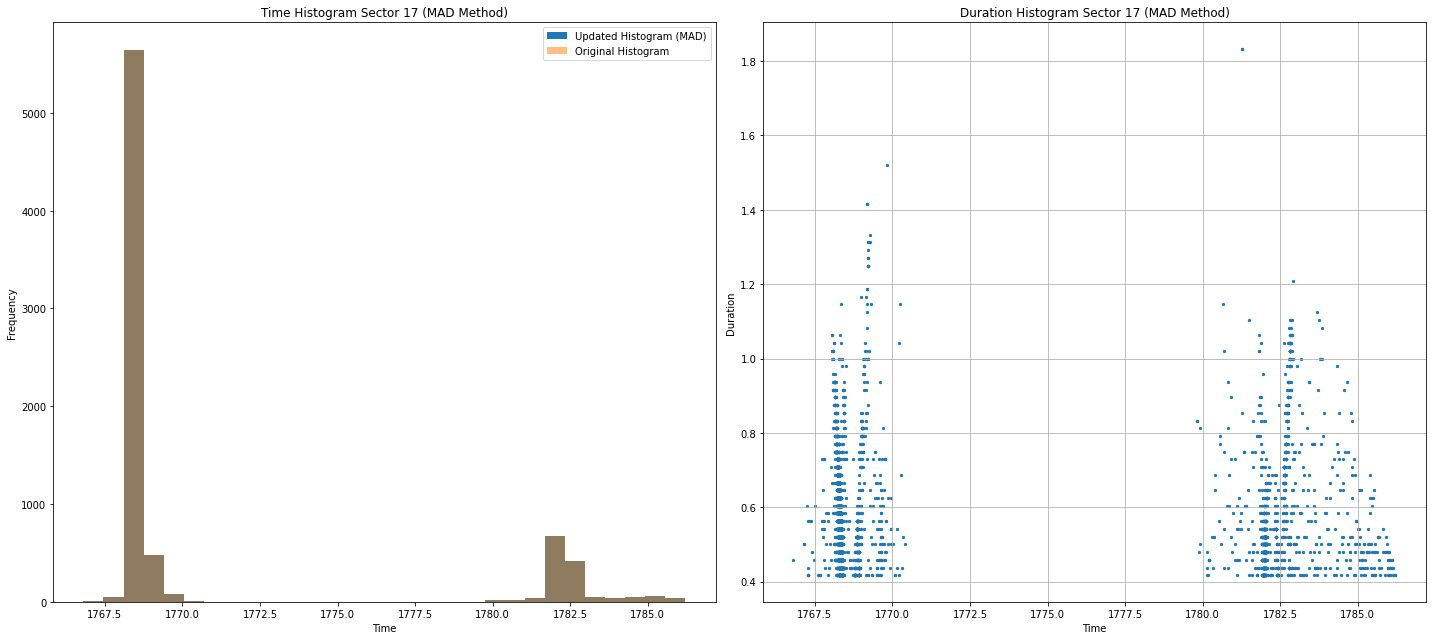

total candidates of Sector 17: 7668


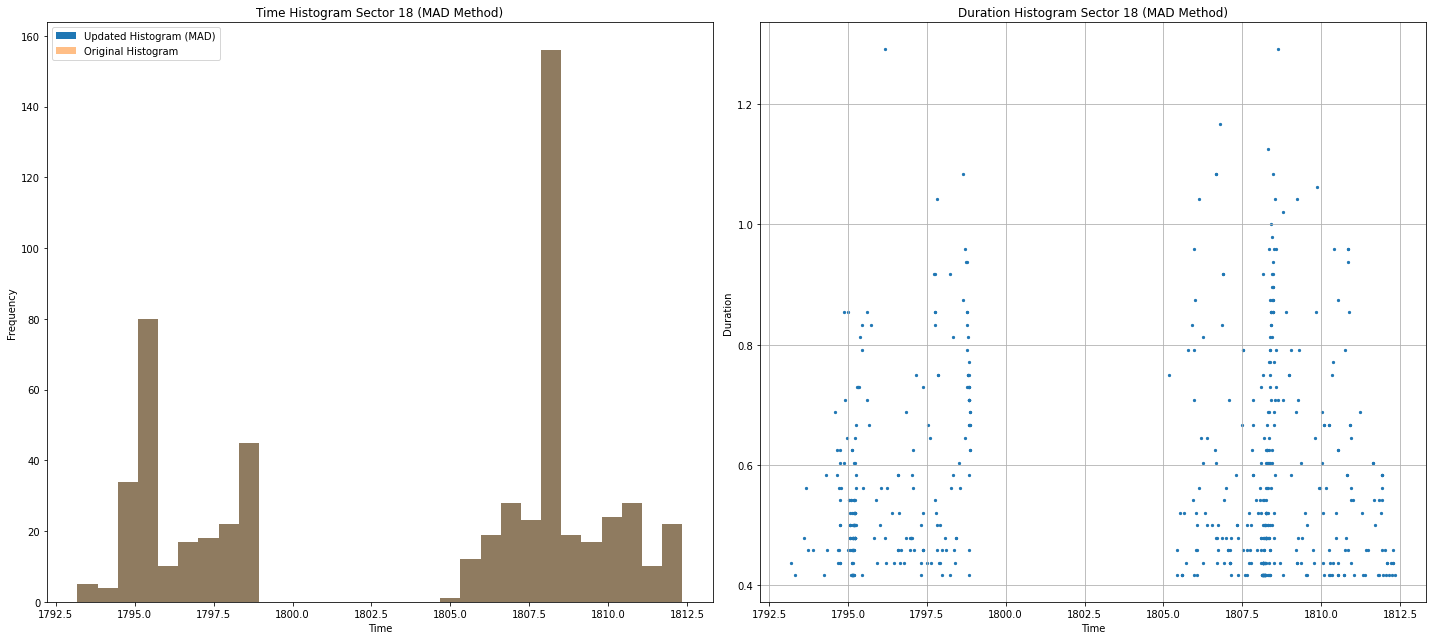

total candidates of Sector 18: 594


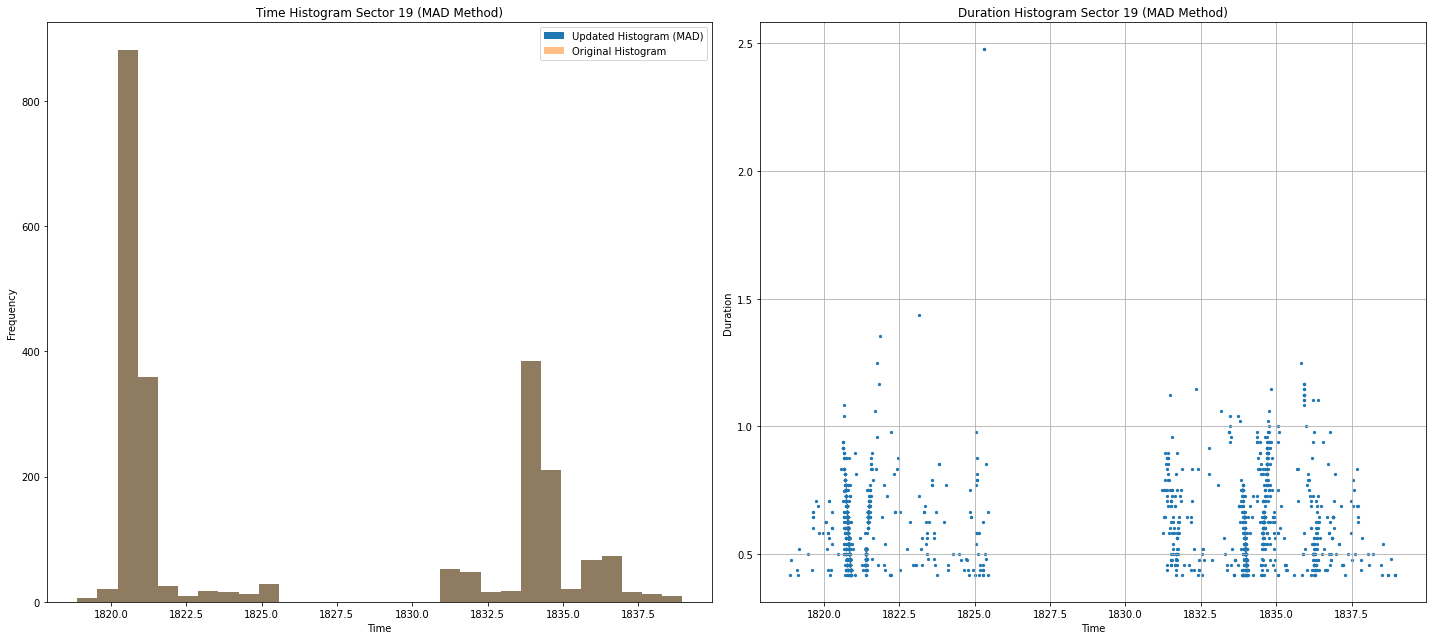

total candidates of Sector 19: 2302


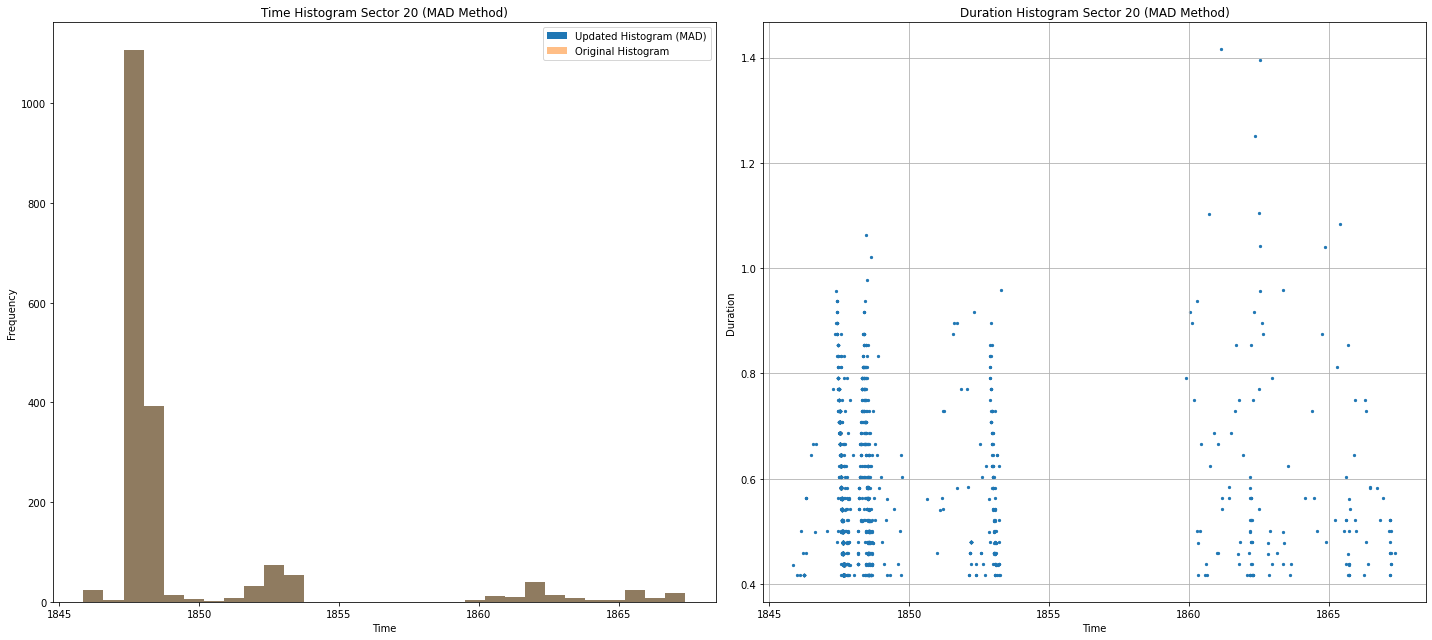

total candidates of Sector 20: 1854


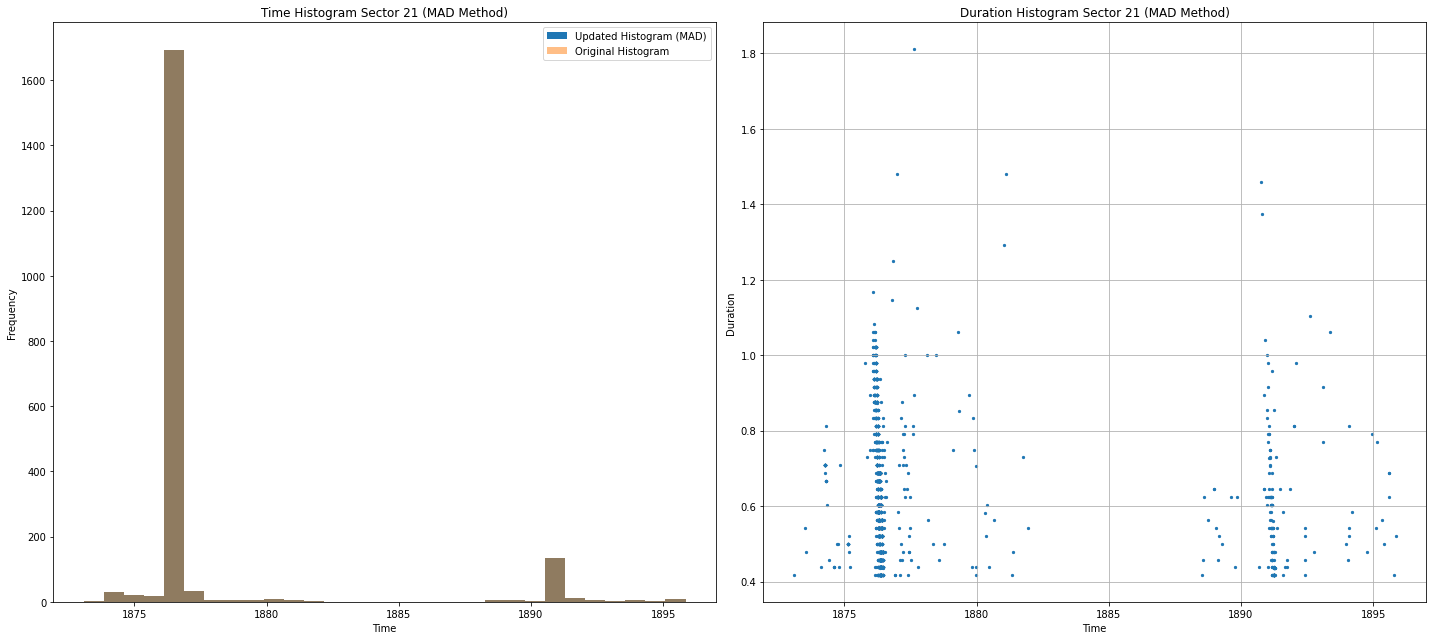

total candidates of Sector 21: 2016


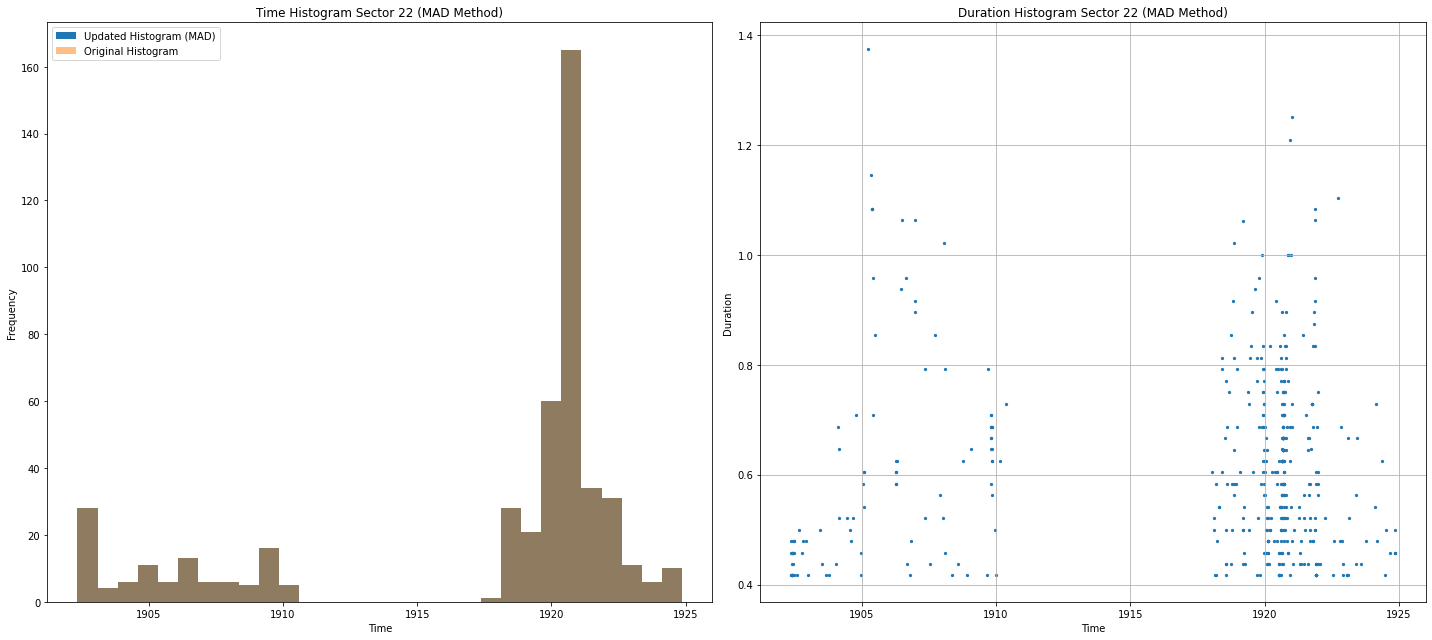

total candidates of Sector 22: 473


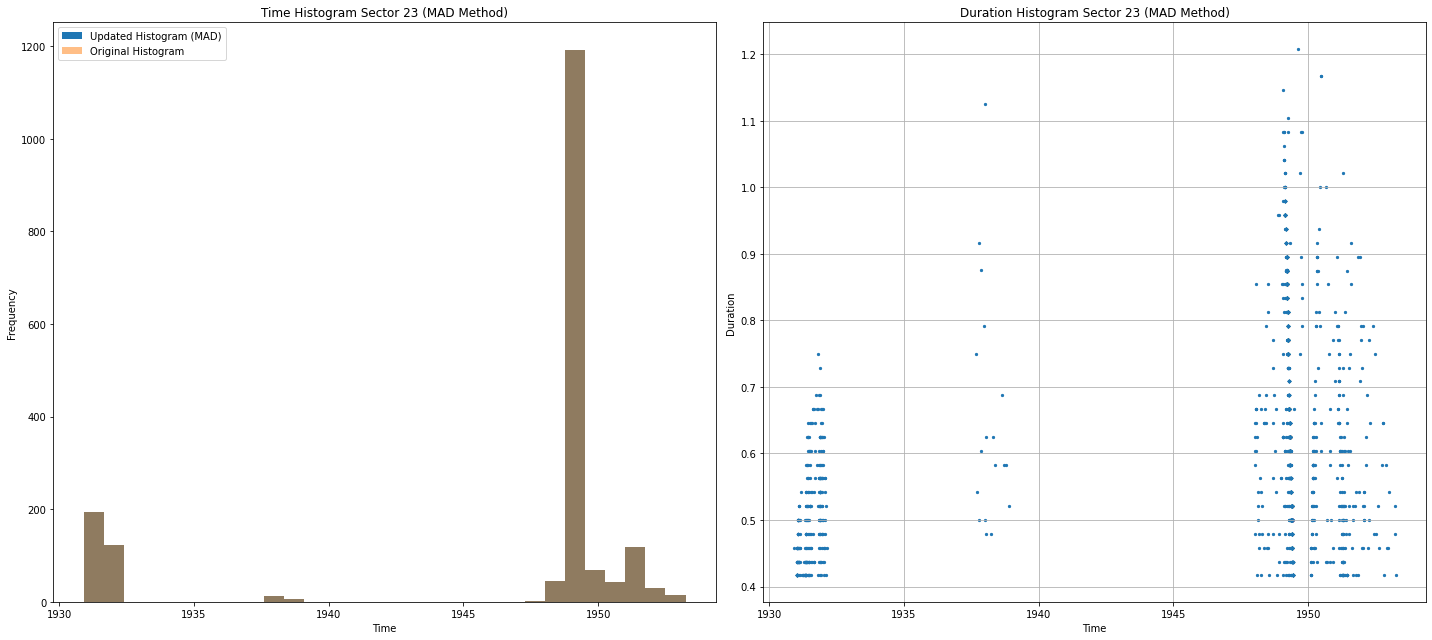

total candidates of Sector 23: 1843


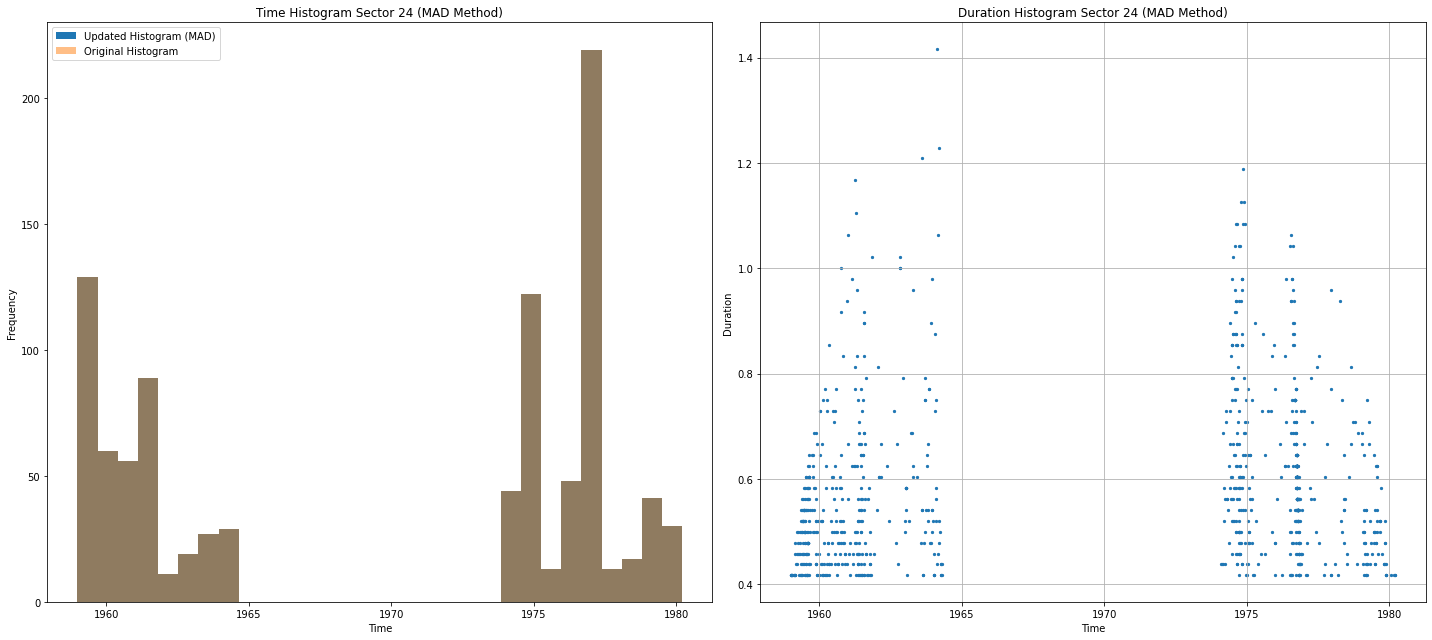

total candidates of Sector 24: 967


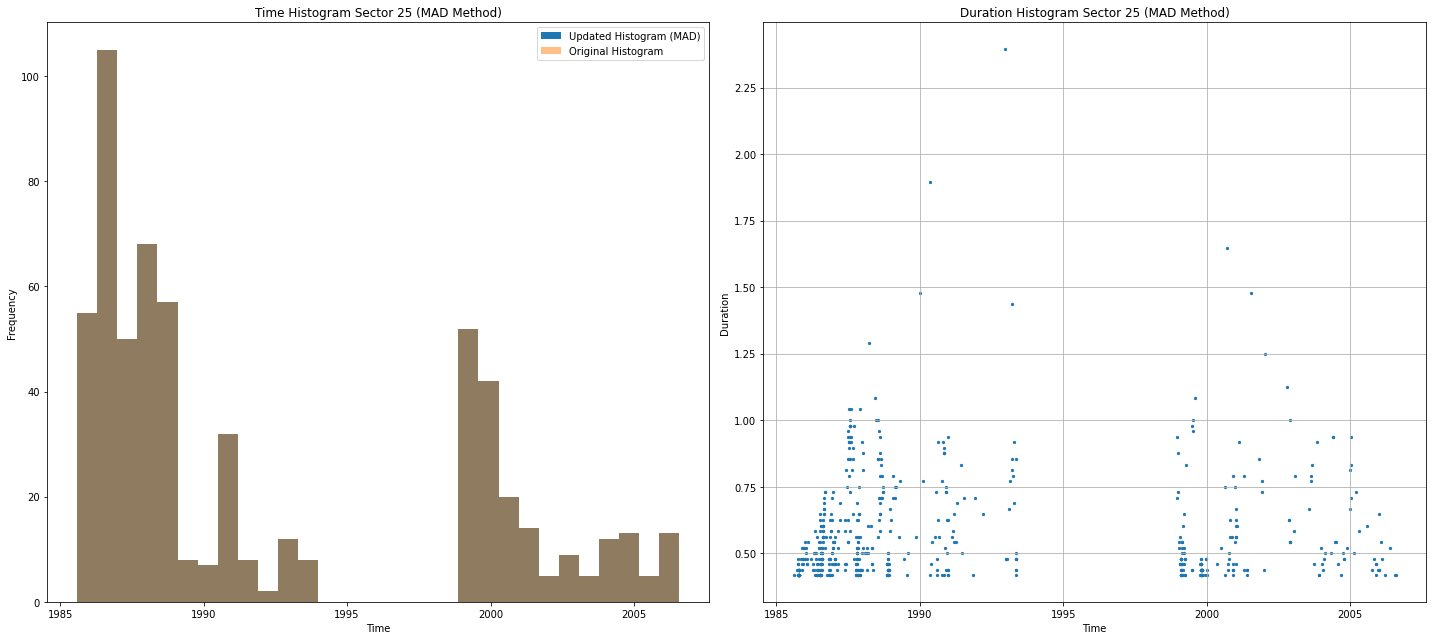

total candidates of Sector 25: 602


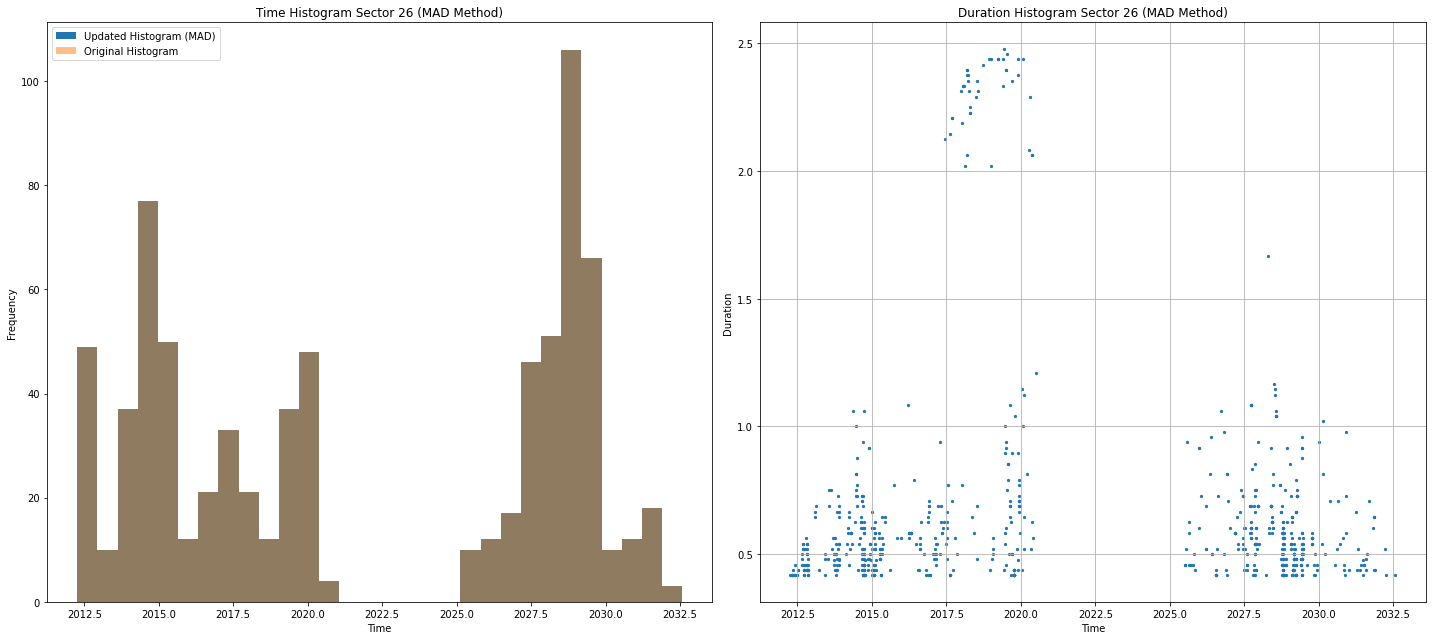

total candidates of Sector 26: 762


In [4]:
max_iterations = 10
initial_sigma = 5

# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Initialize MAD and sigma
    mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
    sigma = initial_sigma
    
    for iteration in range(max_iterations):
        # Calculate the histogram values and bin edges using np.histogram
        time_histogram, bin_edges = np.histogram(data_new['time'], bins=30)
        
        # Calculate the counts in the anomalous bins
        anomalous_bins = np.abs(time_histogram - np.median(time_histogram)) > sigma * mad
        anomalous_counts = time_histogram[anomalous_bins]
        
        # Remove data points (bins) corresponding to anomalous bins
        #data_new = data_new[~anomalous_bins]
        
        # Update MAD and sigma based on the remaining data
        mad = np.median(np.abs(data_new['time'] - np.median(data_new['time'])))
        sigma = 10  # You can adjust the initial_sigma value here
        
        # Check for convergence (no more anomalous bins)
        if np.sum(anomalous_counts) == 0:
            break
    
    # ... (your existing code)
    
    # Create a subplot
    fig, ax = plt.subplots(1, 2, figsize=(20, 9))
    
    # Plot the updated histogram including all columns (MAD method)
    ax[0].hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram (MAD)')
    
    # Plot the original 'data_new.time' histogram
    ax[0].hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax[0].set_title('Time Histogram Sector {} (MAD Method)'.format(sector))
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    
    ax[1].scatter(data_new.time, data_new.duration, s=5)
    ax[1].set_title('Duration Histogram Sector {} (MAD Method)'.format(sector))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Duration')
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    
    # Show the subplot
    plt.show()
    
    print(f"total candidates of Sector {sector}: {len(data_new)}")

## Robust Z-score method

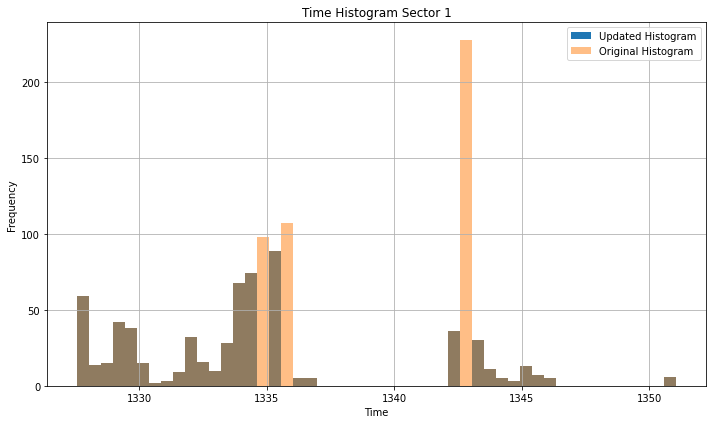

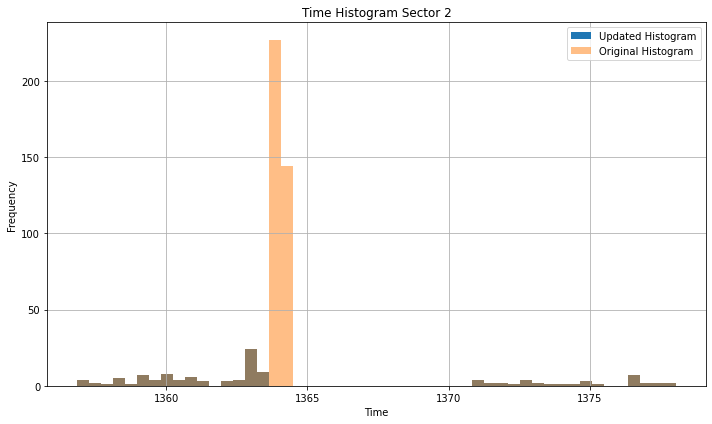

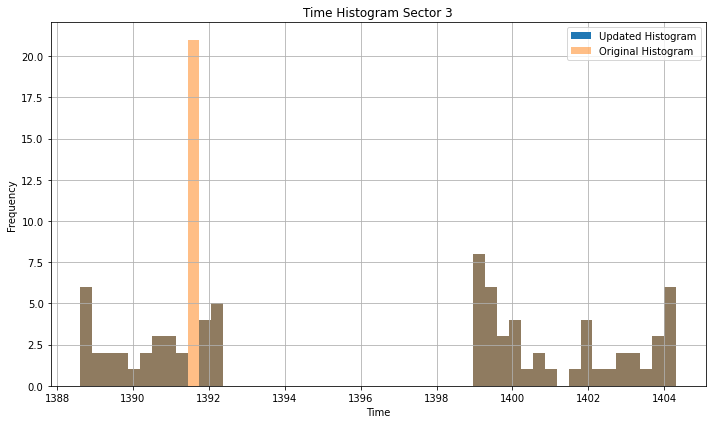

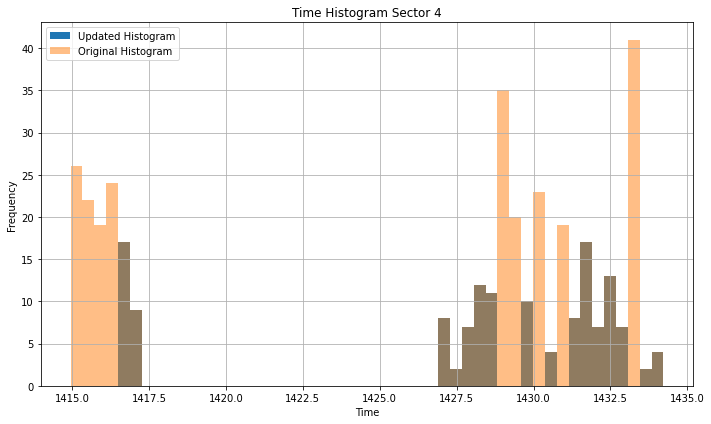

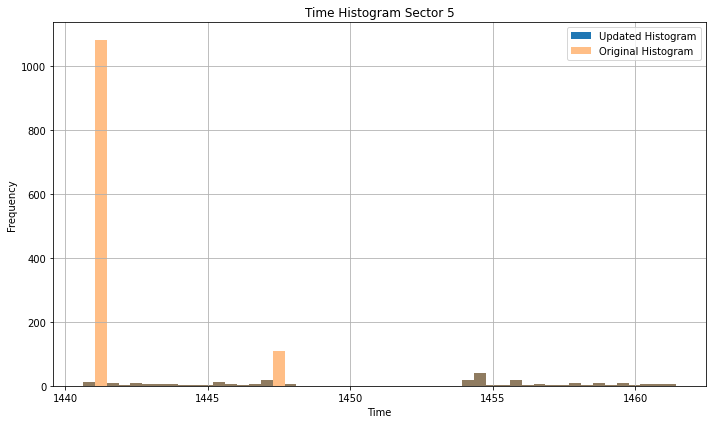

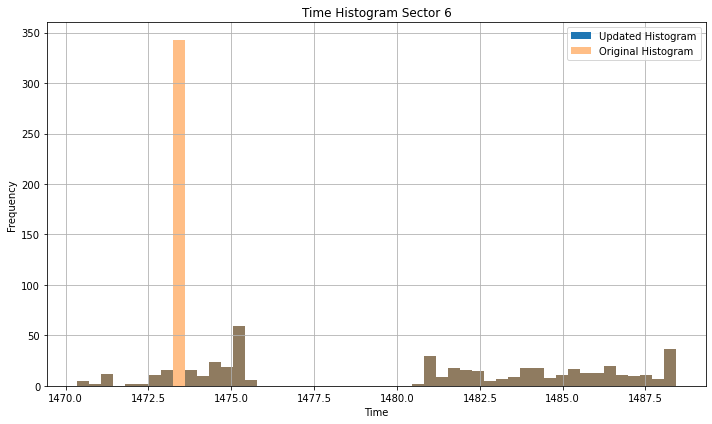

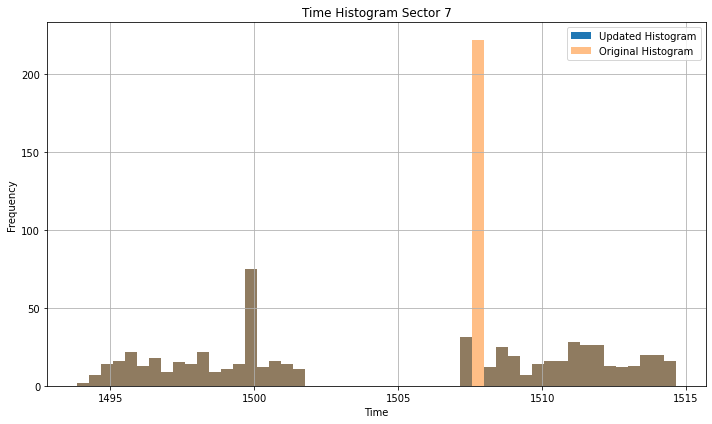

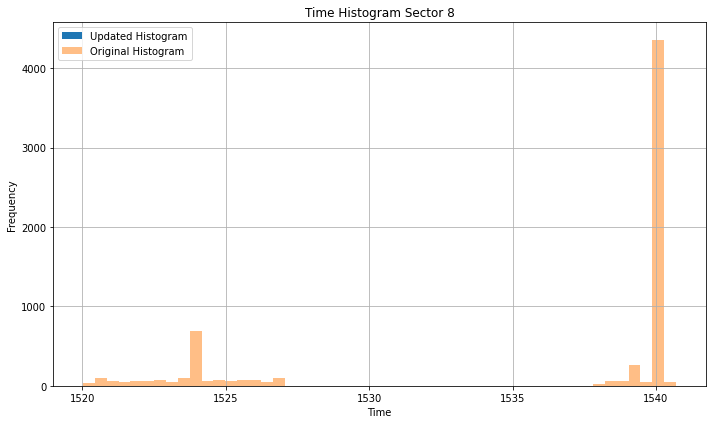

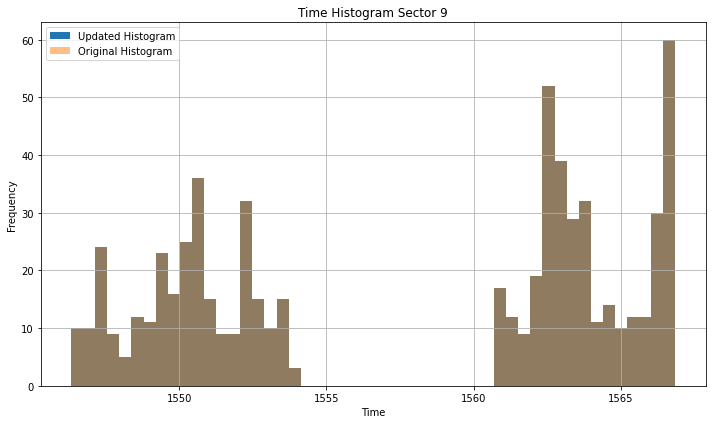

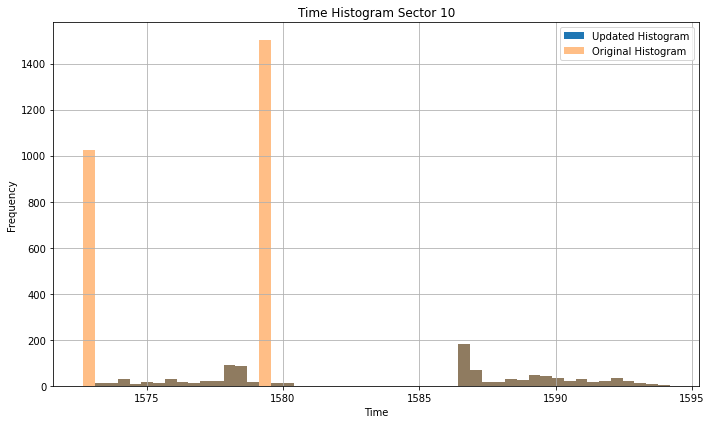

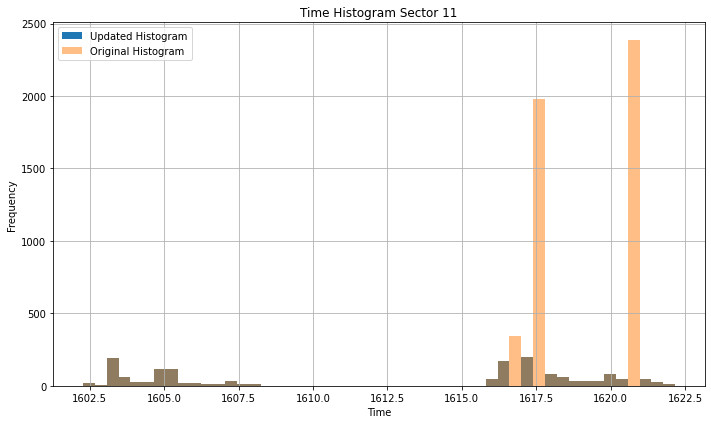

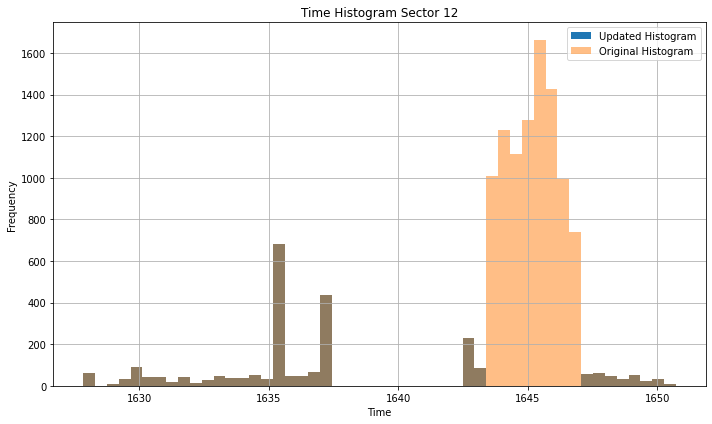

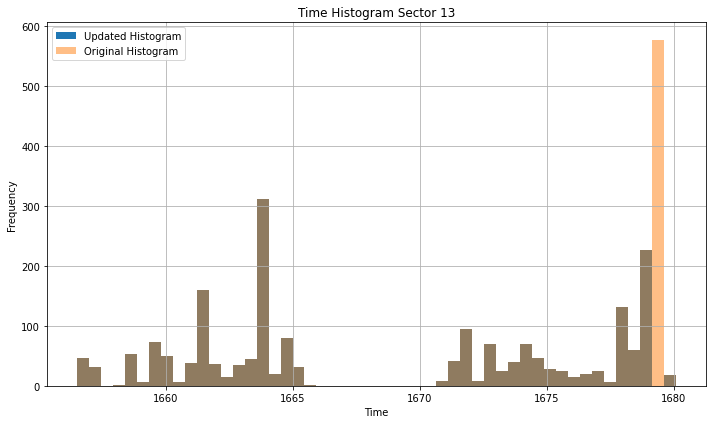

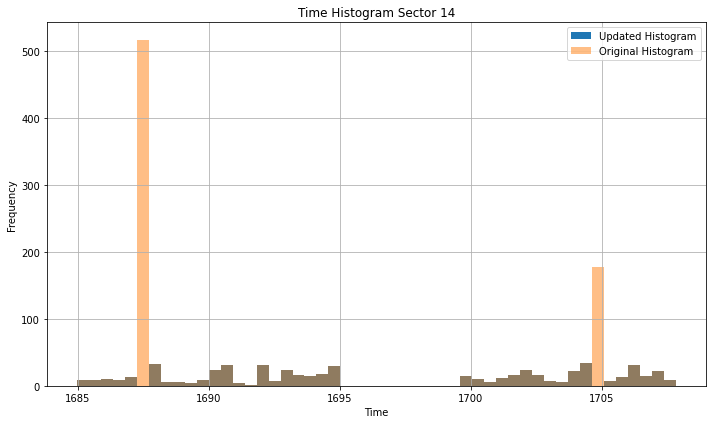

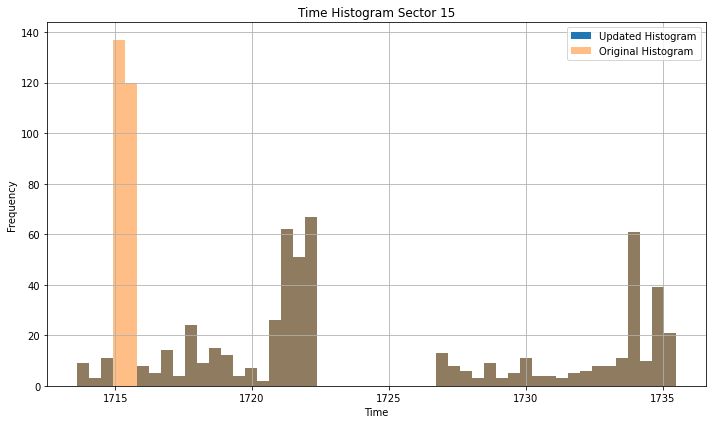

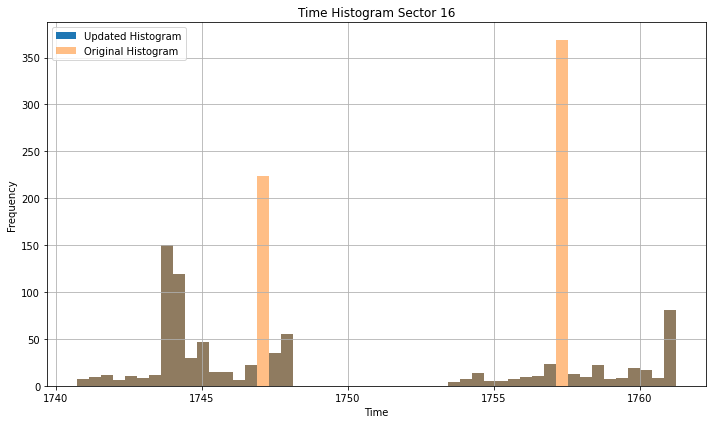

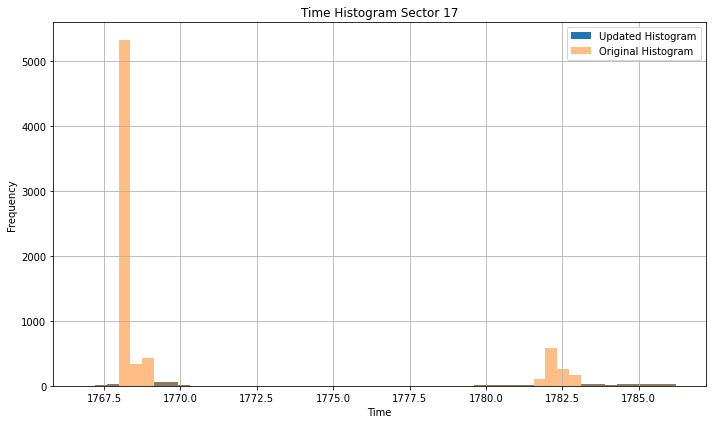

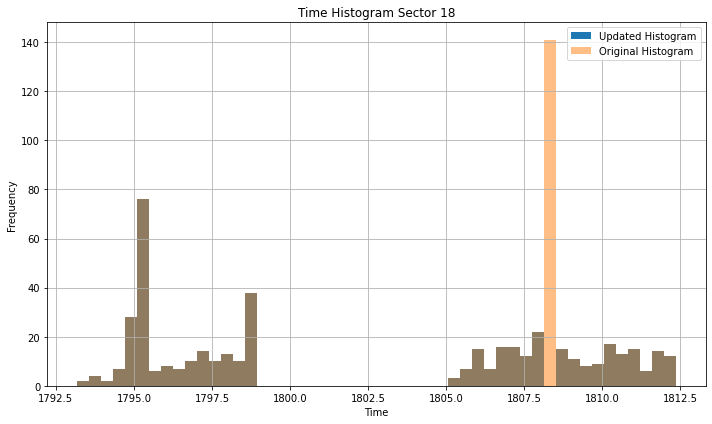

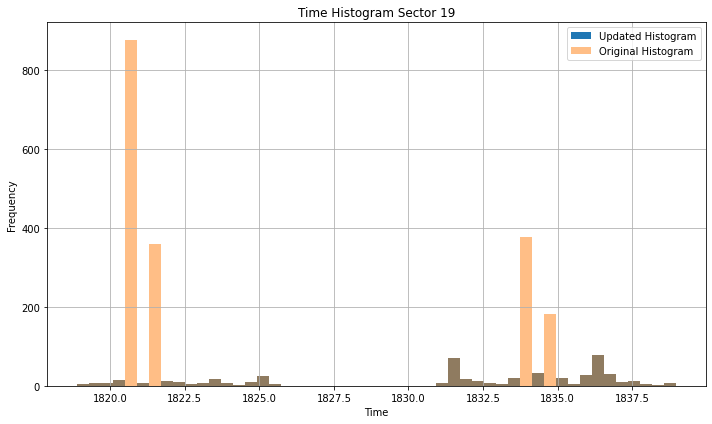

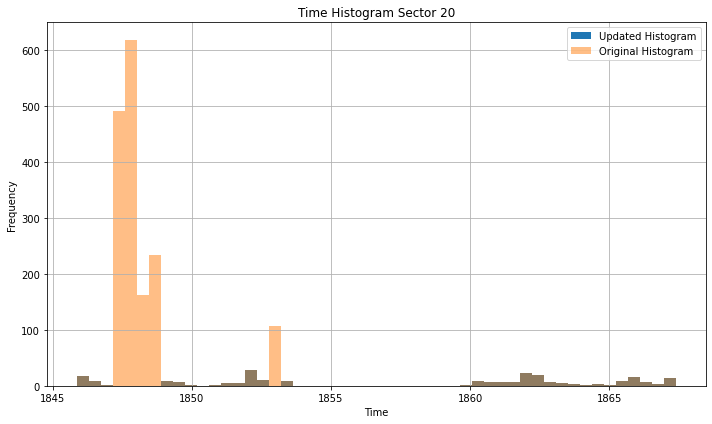

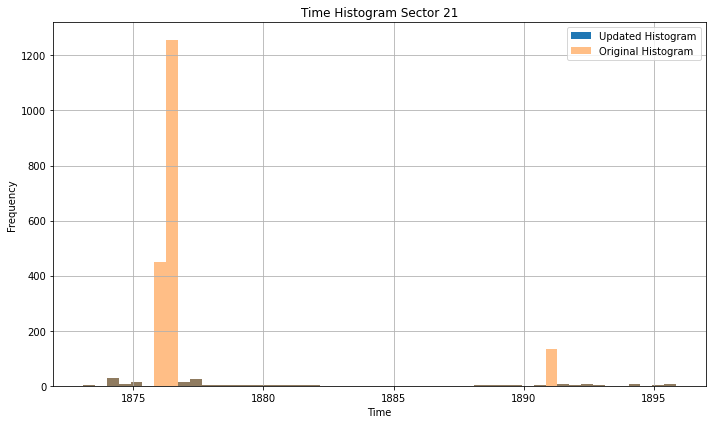

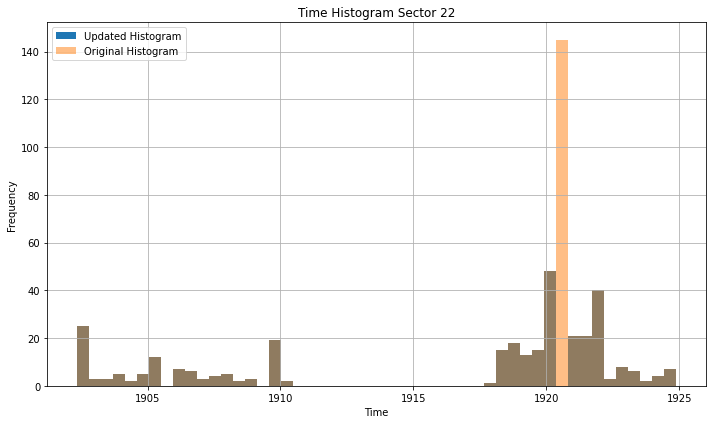

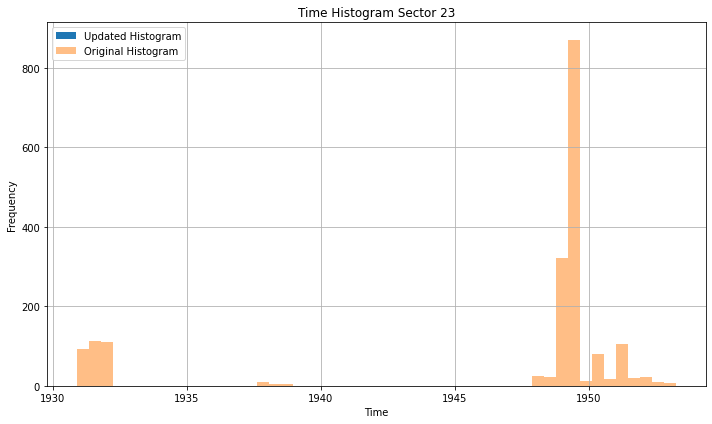

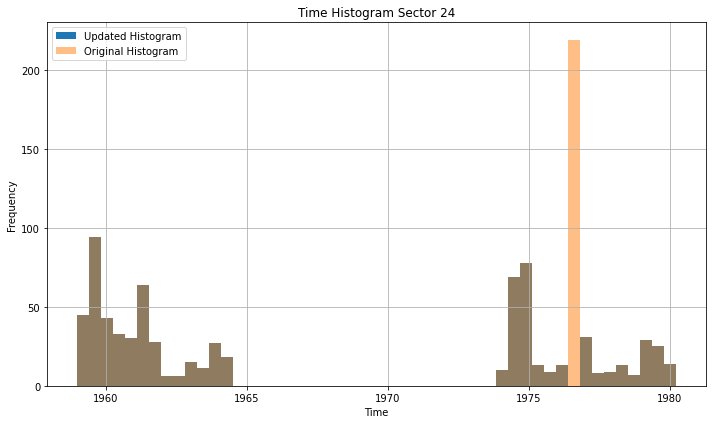

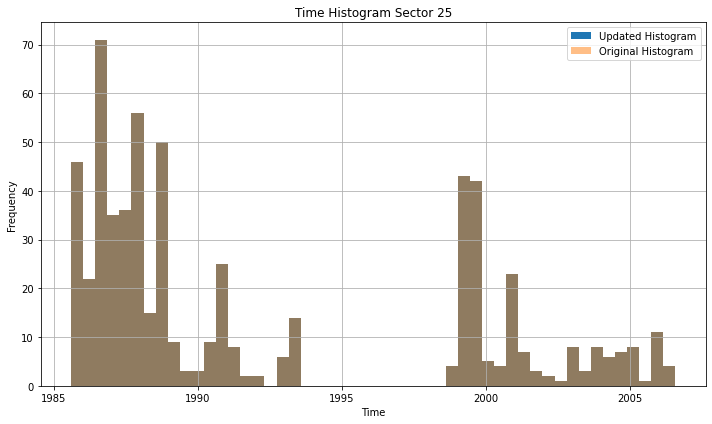

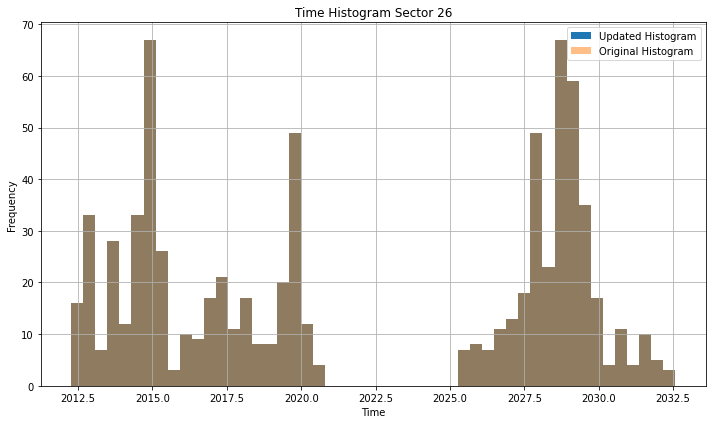

In [9]:
# Assuming 'data_new' is your DataFrame with the 'time' column
# Replace this with your actual DataFrame
data_new = pd.DataFrame({'time': [...]})  # Replace [...] with your 'time' data

for sector in range(1, 27):
    # Construct the dataframe variable name
    dataframe_name = 'sector_' + str(sector)
    
    # Access the dataframe using globals() and the constructed variable name
    data = globals()[dataframe_name]
    data = data[data.transit_prob == 'maybeTransit']
    data = data[(data.asym_score <= 3)].reset_index(drop=True)
    data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
    data_new.drop(data_new[data_new['duration'] <= 0.4].index, inplace=True)
    data_new['abs_depth'] = abs(data_new.depth)
    data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index, inplace=True)
    
    # Calculate the histogram values and bin edges using np.histogram
    time_histogram, bin_edges = np.histogram(data_new['time'], bins=50)
    
    median = np.median(time_histogram)
    mad = np.median(np.abs(time_histogram - median))
    
    # Calculate the robust Z-scores for each bin
    robust_z_scores = [(x - median) / (1.4826 * mad) for x in time_histogram]
    
    # Define the threshold for identifying anomalous bins (e.g., 10 robust sigma)
    threshold = 12
    # Identify and remove anomalous bins
    anomalous_bins = [i for i, z in enumerate(robust_z_scores) if z > threshold]
    
    # Update the histogram by setting values of anomalous bins to zero
    for i in anomalous_bins:
        time_histogram[i] = 0  # Set to zero or any other appropriate value
    
    
    # Create a subplot
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    # Plot the updated histogram without zeros
    ax.hist(bin_edges[:-1], bins=bin_edges, weights=time_histogram, label='Updated Histogram')

    
    # Plot the original 'data_new.time' histogram
    ax.hist(data_new['time'], bins=bin_edges, alpha=0.5, label='Original Histogram')
    
    ax.set_title('Time Histogram Sector {}'.format(sector))
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.legend()
    
    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()
    plt.grid()
    plt.show()

    # Show the subplot

In [17]:
sector_5['path'] = sector_5['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')

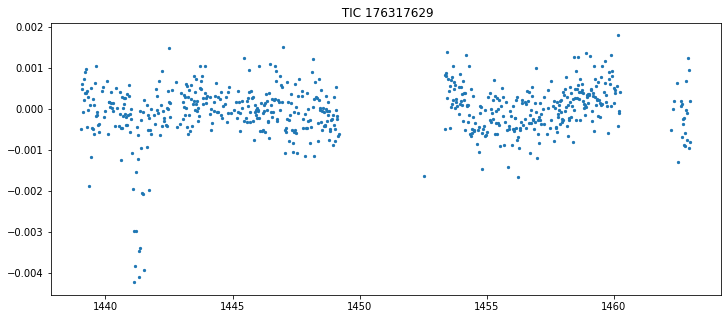

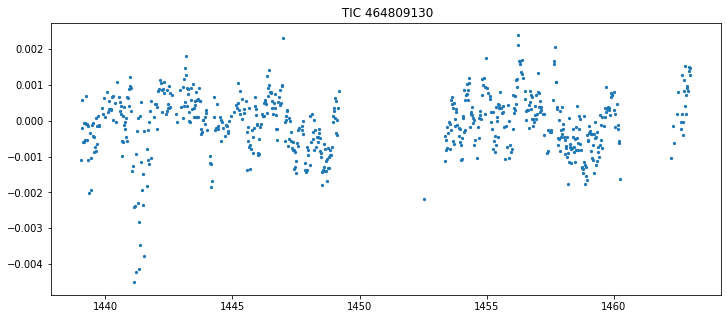

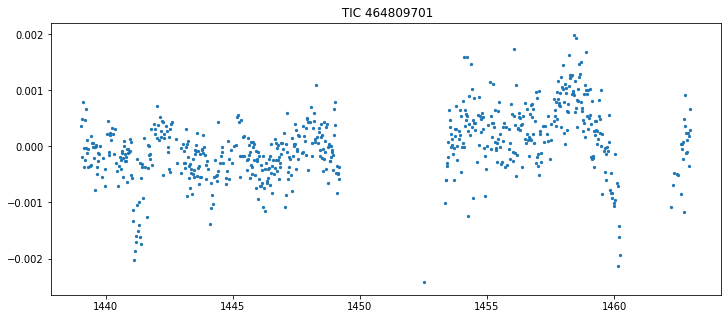

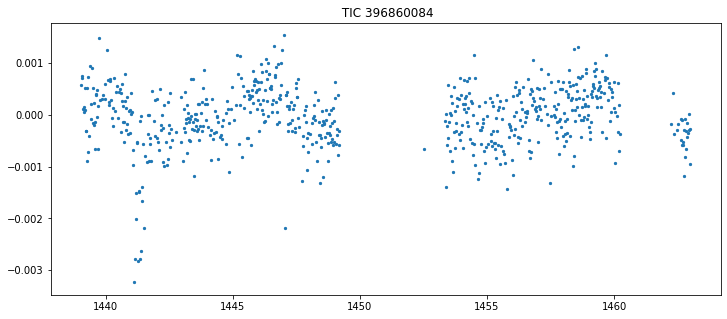

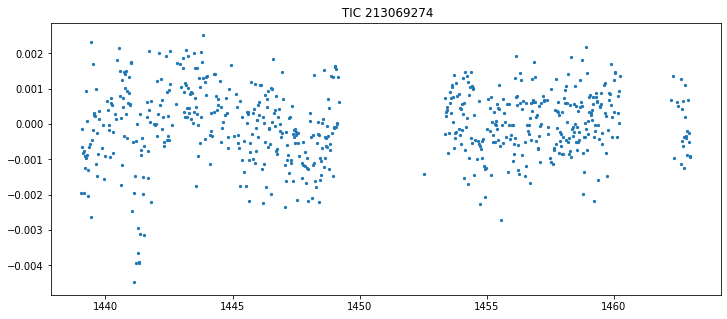

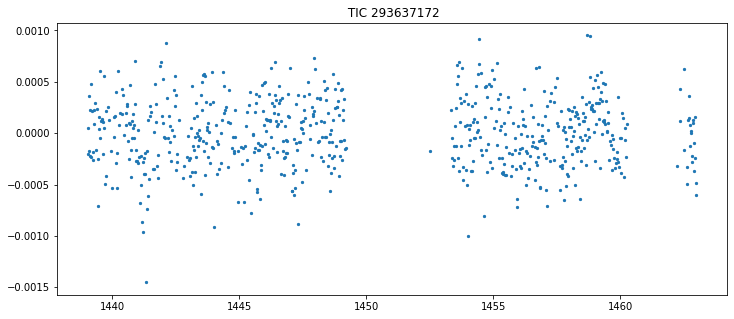

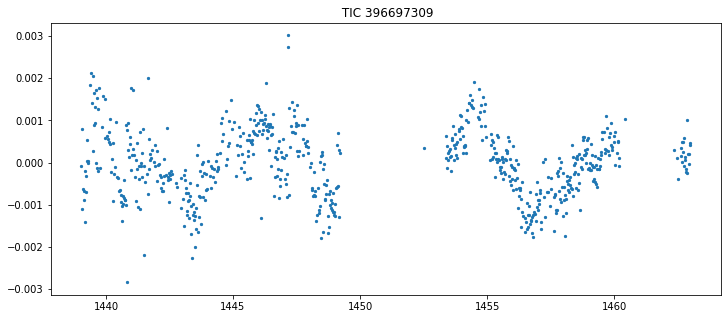

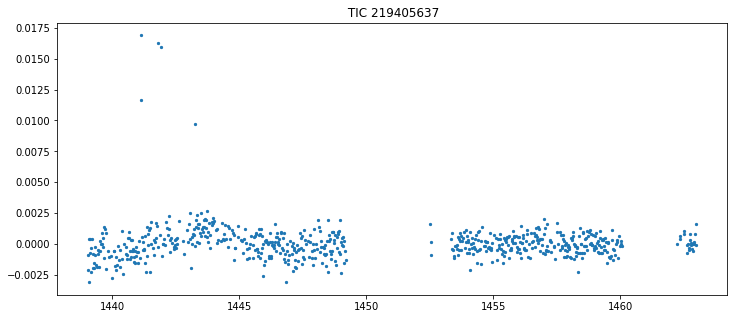

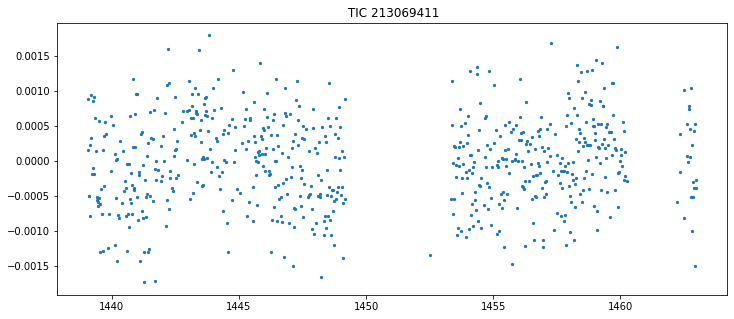

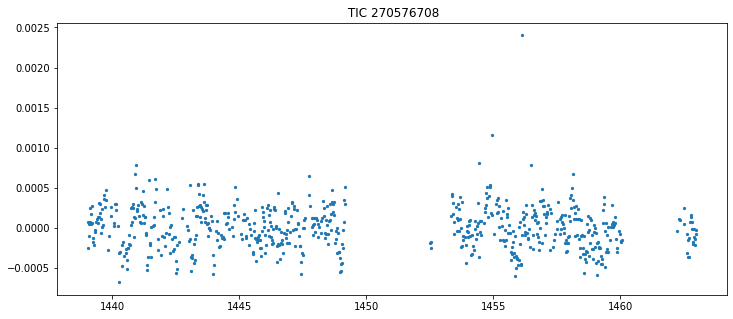

In [19]:
for i in sector_5[(sector_5.time >= 1440) & (sector_5.time <= 1442) & (sector_5.duration >= 0.4) & (sector_5.duration <= 0.5)].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()